### 1. Анализ данных

In [1]:
import pandas as pd

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import re
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


warnings.filterwarnings("ignore")


def draw_barplot(x,y,title,x_label, y_label,palette):
    plt.figure(figsize=(8,8))
    diag1=sns.barplot(y=y, x=x, palette=palette)
    diag1.set_title(title)
    diag1.set_xlabel(x_label)
    diag1.set_ylabel(y_label)
    plt.show()
    
    return 
    
def draw_boxplot(fig_size,x_data, y_data,hue, palette, title,x_label, y_label):
    plt.figure(figsize=fig_size)
    sns.set_theme(style='whitegrid')
    bxplt=sns.boxplot(x=x_data, y=y_data,hue=hue, palette=palette)
    bxplt.set_title(title)
    bxplt.set_xlabel(x_label)
    bxplt.set_ylabel(y_label)
    
    plt.show()    
    return

   
def find_pattern(string, pattern):
    if re.search(pattern, string):
        return re.search(pattern, string).group(0)



In [2]:
autos_df=pd.read_excel('C:/Users/vlasi/Downloads/auto_complectations.xlsx')

In [3]:
autos_df.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


In [4]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   brand                                                 1703 non-null   object
 1   model                                                 1703 non-null   object
 2   complect                                              1703 non-null   object
 3   type_car                                              1703 non-null   object
 4   seats                                                 1703 non-null   int64 
 5   doors                                                 1703 non-null   int64 
 6   Двигатель                                             1703 non-null   object
 7   Мощность                                              1703 non-null   object
 8   Крутящий момент двигателя                             1703 non-null 

Уберем лишние знаки табуляции

In [5]:
autos_df = autos_df.rename(columns=lambda x: re.sub('\n','',x))

In [6]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   brand                                                1703 non-null   object
 1   model                                                1703 non-null   object
 2   complect                                             1703 non-null   object
 3   type_car                                             1703 non-null   object
 4   seats                                                1703 non-null   int64 
 5   doors                                                1703 non-null   int64 
 6   Двигатель                                            1703 non-null   object
 7   Мощность                                             1703 non-null   object
 8   Крутящий момент двигателя                            1703 non-null   object
 9

В предоставленном датасете 1703 записи и 20 признаков, null и NaN нет.

Посмотрим на каждый признак:

In [7]:
grp_by_brand=pd.DataFrame(data=autos_df.groupby('brand')['model'].count())\
                                                                 .reset_index()\
                                                                  .sort_values(by='model', ascending=False)
                                                                  


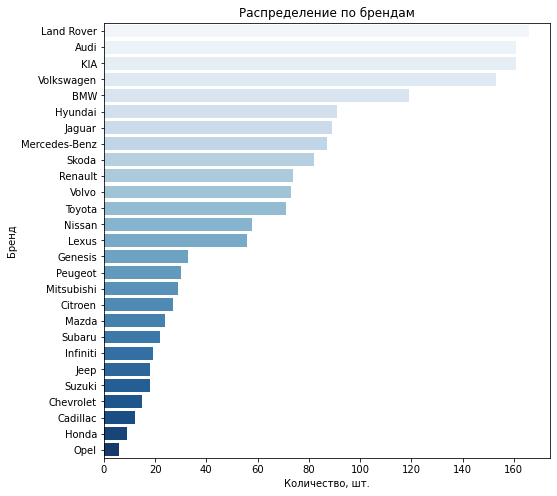

In [8]:
draw_barplot(grp_by_brand.model,grp_by_brand.brand,'Распределение по брендам', 'Количество, шт.','Бренд','Blues')


Топ 5 марок это LandRover, Audi, Kia, Volkswagen и BMW

Посмотрим распределение по ассортименту-количество моделей на марку:

In [9]:
grp_by_model=pd.DataFrame(data=autos_df.groupby('brand')['model'].agg('nunique'))\
                                                                 .reset_index()\
                                                                 .sort_values(by='model', ascending=False)
                                                                  

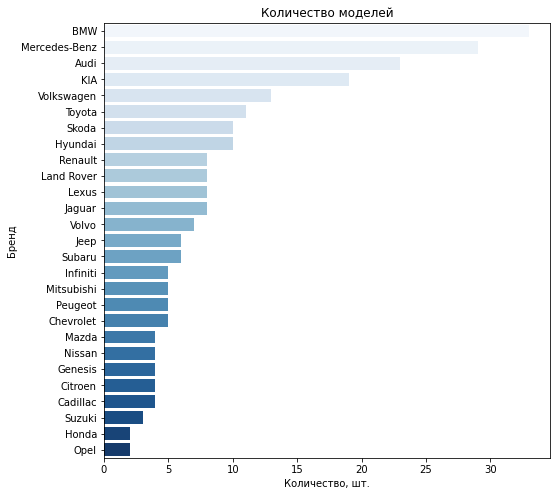

In [10]:
draw_barplot(grp_by_model.model,grp_by_model.brand,'Количество моделей', 'Количество, шт.','Бренд','Blues')

По ассортименту LandRover в топ 5 не вошел, здесь его опередил MercedesBenz, BMW имеет самый широкий модельный ряд, хотя по количеству авто он замыкает 5ку.

Посмотрим, какие бренды предлагают самое большое количество комплектаций на модель

In [11]:
grp_by_complect=pd.DataFrame(data=autos_df.groupby(['brand'])['model','complect'].agg('nunique'))\
                                                                 .reset_index()\
                                                                 .sort_values(by='complect', ascending=False)
grp_by_complect['complect_per_model']=round(grp_by_complect.complect/grp_by_complect.model,0)
grp_by_complect=grp_by_complect.sort_values(by='complect_per_model', ascending=False)

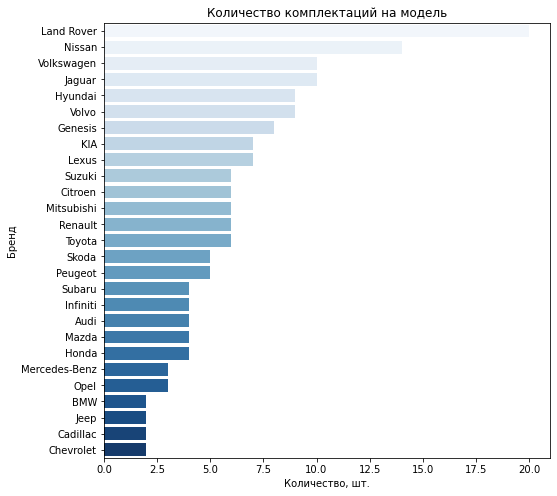

In [12]:
draw_barplot(grp_by_complect.complect_per_model,grp_by_complect.brand,'Количество комплектаций на модель', 'Количество, шт.','Бренд','Blues')

Заметно, что бренды с не слишком широким модельным рядом предлагают в среднем больше комплектаций своих автомобилей.

Посмотрим распределение по типам машин:

In [13]:
grp_by_type=pd.DataFrame(data=autos_df.groupby('type_car')['brand'].count())\
                                                                 .reset_index()\
                                                                 .sort_values(by='brand', ascending=False)

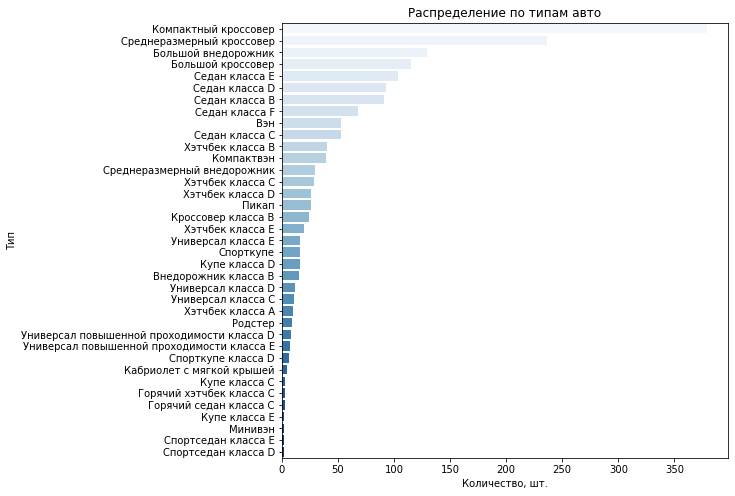

In [14]:
draw_barplot(grp_by_type.brand,grp_by_type.type_car,'Распределение по типам авто', 'Количество, шт.','Тип','Blues')

По типам машин преобладают кроссоверы, внедорожники и премиальные седаны. Видно, что в подгруппах много авто одного типа но разных классов или размеров. Добавим еще 2 поля, в одном укажем общий тип: седан, универсал и т.п., а в другом класс или другой комментарий, например класс Е или среднеразмерный.

In [15]:
autos_df['category']=0
autos_df['class']=0

In [16]:
type_pattern_list={ '\.*\едан\.*':'Седан',
               '\.*\россовер\.*':'Кроссовер',
               '\.*\этчбек\.*':'Хэтчбек',
               '\.*\версал\.*':'Универсал',
               '\.*\икап\.*':'Пикап',
               '\.*\эн\.*':'Вэн',
               '\.*\упе\.*':'Седан',
               '\.*\недорожник\.*':'Внедорожник',
               '\.*\абриолет\.*':'Седан',
               '\.*\одстер\.*':'Седан',
              
              }

In [17]:
class_pattern_list={ '\.*\класса A\.*':'класс А',
               '\.*\класса B\.*':'класс B',
               '\.*\класса C\.*':'класс C',
               '\.*\класса D\.*':'класс D',
               '\.*\класса E\.*':'класс E',
               '\.*\класса F\.*':'класс F',
               '\.*\омпактный\.*':'Компатный',
               '\.*\реднеразмерный\.*':'Среднеразмерный',
               '\.*\ольшой\.*':'Большой',
               '\.*\порт\.*':'Спорт',
               '\.*\одстер\.*':'Родстер',
               '\.*\абриолет\.*':'Кабриолет'            
              
              }

In [18]:
for key, elem in type_pattern_list.items():
    autos_df.loc[autos_df['type_car'].str.contains(key, regex=True),'category']=elem    

In [19]:
for key, elem in class_pattern_list.items():
    autos_df.loc[autos_df['type_car'].str.contains(key, regex=True),'class']=elem 

Проверим распределение по коробкам передач:

In [20]:
grp_by_trans=pd.DataFrame(data=autos_df.groupby('Коробка передач')['brand'].count())\
                                                                 .reset_index()\
                                                                 .sort_values(by='brand', ascending=False)

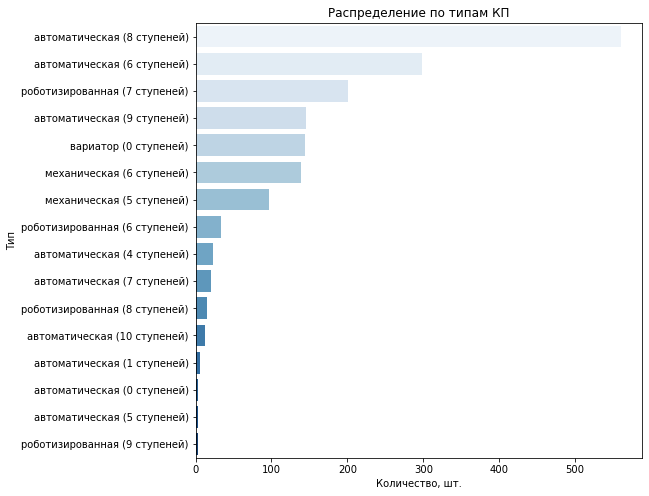

In [21]:
draw_barplot(grp_by_trans.brand,grp_by_trans['Коробка передач'],'Распределение по типам КП', 'Количество, шт.','Тип','Blues')

Большинство автомобилей имеют либо автоматическую либо роботизированную коробку передач, механических практически нет.

Посмотрим на типы приводов:

In [22]:
grp_by_gear=pd.DataFrame(data=autos_df.groupby('Привод')['brand'].count())\
                                                                 .reset_index()\
                                                                 .sort_values(by='brand', ascending=False)

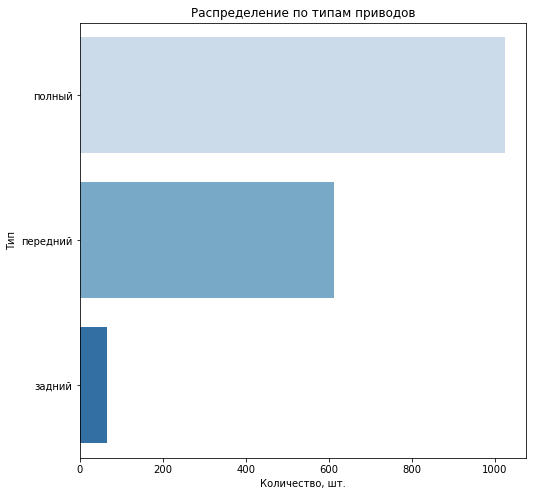

In [23]:
draw_barplot(grp_by_gear.brand,grp_by_gear['Привод'],'Распределение по типам приводов', 'Количество, шт.','Тип','Blues')

Большая часть автомобилей полноприводные.

Чтобы продолжить анализ данных извлечем из признаков ниже числовые данные и продолжим разбор:

Двигатель

Мощность	

Крутящий момент двигателя	

Коробка передач	

Привод	

Разгон до сотни	Максимальная скорость	

Расход топлива (л/100 км) город / трасса / смешанный	

Дорожный просвет	

Габариты (длина × ширина × высота)	

Колёсная база	

Объём багажника	

Объём багажника максимальный	

Объём топливного бака	

Масса автомобиля


Двигатель, мне нужен объем и тип двигателя:

In [24]:
autos_df['Двигатель'].value_counts()

бензиновый (1598 см³)    138
бензиновый (1984 см³)    113
бензиновый (1998 см³)    105
бензиновый (1997 см³)     94
бензиновый (1591 см³)     83
                        ... 
бензиновый (2457 см³)      1
бензиновый (4969 см³)      1
гибридный (1991 см³)       1
бензиновый (6417 см³)      1
бензиновый (6592 см³)      1
Name: Двигатель, Length: 116, dtype: int64

У нас 116 различных значений, создадим 2 новых столбца: 

1- тип двигателя(бензин, дизель, гибрид и т.д.)

2- объем(только значение)

In [25]:
volume_pattern='\d{1,4}'
eng_pattern='\w*?[а-яА-ЯёЁ]*'

In [26]:
autos_df['engine_volume'] = autos_df['Двигатель'].apply(lambda x: find_pattern(x,volume_pattern))
autos_df['engine_type'] = autos_df['Двигатель'].apply(lambda x: find_pattern(x,eng_pattern))

Аналогично разобъем данные по коробке передач на тип(автомат, робот или механика) и количество ступеней:

In [27]:
step_pattern='\d{1}'
gear_pattern='\w*?[а-яА-ЯёЁ]*'

In [28]:
autos_df['gear_type'] = autos_df['Коробка передач'].apply(lambda x: find_pattern(x,gear_pattern))
autos_df['gear_steps'] = autos_df['Коробка передач'].apply(lambda x: find_pattern(x,step_pattern))

Из поля мощность мне также нужны только числовые данные:

In [29]:
pow_pattern='\d{1,6}'

In [30]:
autos_df['power'] = autos_df['Мощность'].apply(lambda x: find_pattern(x,pow_pattern))

Аналогично найдем крутящий момент,максимальную скорость,дорожный просвет, колесную базу, объемы багажника(обычный и максимальный), объем топливного бака и массу автомобиля. Используем один шаблон, здесь нужна только последовательность цифр:

In [31]:
autos_df['driving_moment'] = autos_df['Крутящий момент двигателя'].apply(lambda x: find_pattern(x,pow_pattern))
autos_df['max_speed'] = autos_df['Максимальная скорость'].apply(lambda x: find_pattern(x,pow_pattern))
autos_df['wheelbase'] = autos_df['Колёсная база'].apply(lambda x: find_pattern(x,pow_pattern))
autos_df['road_clearance'] = autos_df['Дорожный просвет'].apply(lambda x: find_pattern(x,pow_pattern))
autos_df['trunk_volume'] = autos_df['Объём багажника'].apply(lambda x: find_pattern(x,pow_pattern))
autos_df['trunk_volume_max'] = autos_df['Объём багажника максимальный'].apply(lambda x: find_pattern(x,pow_pattern))
autos_df['fuel_tank_volume'] = autos_df['Объём топливного бака'].apply(lambda x: find_pattern(x,pow_pattern))
autos_df['auto_weight'] = autos_df['Масса автомобиля'].apply(lambda x: find_pattern(x,pow_pattern))

Посмотрим, какие данные имеются в поле 'Разгон до сотни'

In [32]:
autos_df['Разгон до сотни'].value_counts()

нет данных      71
9.2 секунды     43
10.5 секунды    39
8.1 секунды     37
8.9 секунды     37
                ..
5 секунды        2
13.5 секунды     1
3.6 секунды      1
17.6 секунды     1
14 секунды       1
Name: Разгон до сотни, Length: 112, dtype: int64

Заменим нет данных на 0.0 и извлечем числовые значения

In [33]:
autos_df['Разгон до сотни']=autos_df['Разгон до сотни'].str.replace('нет данных','0.0')

In [34]:
h_pattern='.*[^а-яА-ЯёЁ]'

In [35]:
autos_df['speed_100'] = autos_df['Разгон до сотни'].apply(lambda x: find_pattern(x,h_pattern))

In [36]:
autos_df['speed_100']

0       8.2 
1       8.2 
2       6.8 
3       6.2 
4       6.8 
        ... 
1698    7.8 
1699    6.5 
1700    7.8 
1701    5.6 
1702    5.6 
Name: speed_100, Length: 1703, dtype: object

По расходу топлива нам нужны 3 показателя: расход в городе, расход по трассе и смешанный

In [37]:
с_pattern='^[^а-яА-ЯёЁ]{1,3}'

In [38]:
autos_df['fuel_cons_city']=autos_df['Расход топлива (л/100 км)город / трасса / смешанный'].apply(lambda x: find_pattern(x,с_pattern)).str.replace('/',"")

In [39]:
f_pattern='/\s\d{1,3}\.\d{1,3}\s\/'

In [40]:
autos_df['fuel_cons_freeway']=autos_df['Расход топлива (л/100 км)город / трасса / смешанный'].apply(lambda x: find_pattern(x,f_pattern)).str.replace('/',"")
autos_df['fuel_cons_freeway']=autos_df['fuel_cons_freeway'].fillna(0)

In [41]:
autos_df['fuel_cons_freeway']

0        4.1 
1        4.1 
2        4.7 
3        4.8 
4        4.7 
        ...  
1698     5.5 
1699        0
1700     5.5 
1701        0
1702        0
Name: fuel_cons_freeway, Length: 1703, dtype: object

In [42]:
m_pattern='\s{1}.{1,2}\d{1}\Z'

In [43]:
autos_df['fuel_cons_mixed']=autos_df['Расход топлива (л/100 км)город / трасса / смешанный'].apply(lambda x: find_pattern(x,m_pattern)).str.replace('/',"")
autos_df['fuel_cons_mixed']=autos_df['fuel_cons_mixed'].fillna(0)

Немного изменим шаблоны и аналогичным образом получим данные о габаритах:

In [44]:
len_pattern='\d{4}\s\×'
wdh_pattern='×\s\d{4}\s\×'
hgt_pattern='\d{1,4}\Z'

In [45]:
autos_df['auto_lenght'] = autos_df['Габариты (длина × ширина × высота)'].apply(lambda x: find_pattern(x,len_pattern)).str.replace('×',"")
autos_df['auto_widht'] = autos_df['Габариты (длина × ширина × высота)'].apply(lambda x: find_pattern(x,wdh_pattern)).str.replace('×',"")
autos_df['auto_height'] = autos_df['Габариты (длина × ширина × высота)'].apply(lambda x: find_pattern(x,hgt_pattern)).str.replace('×',"")

Создадим новый датафрейм с новыми данными, нам больше не нужны поля ниже, поэтому в новый датафрейм autos их добавлять не будем:

Двигатель

Мощность    

Крутящий момент двигателя  

Коробка передач   

Привод     

Разгон до сотни    

Максимальная скорость     

Расход топлива (л/100 км)город / трасса / смешанный 

Дорожный просвет    

Габариты (длина × ширина × высота)  

Колёсная база        

Объём багажника    

Объём багажника максимальный    

Объём топливного бака    

Масса автомобиля 


In [46]:
cols_to_drop=['Двигатель',
              'Мощность',
              'Крутящий момент двигателя', 
              'Коробка передач' , 
              'Привод', 
              'Разгон до сотни' , 
              'Максимальная скорость',    
              'Расход топлива (л/100 км)город / трасса / смешанный',
              'Дорожный просвет' ,   
              'Габариты (длина × ширина × высота)', 
              'Колёсная база' ,       
              'Объём багажника',    
             'Объём багажника максимальный' ,   
             'Объём топливного бака' ,   
             'Масса автомобиля' ]

In [47]:
autos=autos_df.drop(cols_to_drop, axis=1)

In [48]:
autos.head(5)

,brand,model,complect,type_car,seats,doors,category,class,engine_volume,engine_type,...,trunk_volume_max,fuel_tank_volume,auto_weight,speed_100,fuel_cons_city,fuel_cons_freeway,fuel_cons_mixed,auto_lenght,auto_widht,auto_height
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,Седан,класс C,1395,бензиновый,...,880,50,1320,8.2,5.9,4.1,4.8,4458,1796,1416
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,Седан,класс C,1395,бензиновый,...,880,50,1320,8.2,5.9,4.1,4.8,4458,1796,1416
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,Седан,класс C,1984,бензиновый,...,880,50,1395,6.8,7.2,4.7,5.6,4458,1796,1416
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,Седан,класс C,1984,бензиновый,...,845,55,1465,6.2,7.2,4.8,5.7,4458,1796,1416
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,Седан,класс C,1984,бензиновый,...,880,50,1395,6.8,7.2,4.7,5.6,4458,1796,1416


In [49]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              1703 non-null   object
 1   model              1703 non-null   object
 2   complect           1703 non-null   object
 3   type_car           1703 non-null   object
 4   seats              1703 non-null   int64 
 5   doors              1703 non-null   int64 
 6   category           1703 non-null   object
 7   class              1703 non-null   object
 8   engine_volume      1703 non-null   object
 9   engine_type        1703 non-null   object
 10  gear_type          1703 non-null   object
 11  gear_steps         1703 non-null   object
 12  power              1703 non-null   object
 13  driving_moment     1703 non-null   object
 14  max_speed          1703 non-null   object
 15  wheelbase          1703 non-null   object
 16  road_clearance     1703 non-null   object


Преобразуем данные с числами к числовому типу:

In [50]:
cols_to_int=['engine_volume',
             'gear_steps',
             'power',
             'driving_moment',
             'max_speed',
             'wheelbase',
             'trunk_volume',
             'trunk_volume_max',
             'fuel_tank_volume',
             'auto_weight', 
             'road_clearance',
             'auto_lenght',
             'auto_widht',
             'auto_height'
]

In [51]:
cols_to_float=['speed_100',
                'fuel_cons_city',
                'fuel_cons_freeway',
                'fuel_cons_mixed'
]

In [52]:
autos[cols_to_int]=autos_df[cols_to_int].astype('int32')
autos[cols_to_float]=autos_df[cols_to_float].astype('float64')

In [53]:
print('Разброс числовых показателей')
round(autos.describe().T,2)

Разброс числовых показателей


,count,mean,std,min,25%,50%,75%,max
seats,1703.0,5.08,0.68,1.0,5.0,5.0,5.0,9.0
doors,1703.0,4.89,1.02,2.0,4.0,5.0,5.0,8.0
engine_volume,1703.0,2256.01,856.80,0.0,1598.0,1997.0,2694.0,6592.0
gear_steps,1703.0,6.41,2.36,0.0,6.0,7.0,8.0,9.0
power,1703.0,214.37,102.46,67.0,150.0,186.0,249.0,639.0
driving_moment,1703.0,349.02,161.90,0.0,213.0,340.0,439.5,900.0
max_speed,1703.0,207.58,31.90,0.0,186.0,205.0,230.0,322.0
wheelbase,1703.0,2802.91,170.95,2250.0,2670.0,2791.0,2923.0,3860.0
road_clearance,1703.0,176.04,47.86,0.0,155.0,184.0,210.0,291.0
trunk_volume,1703.0,501.52,191.73,0.0,428.0,505.0,571.0,1900.0


Продолжим исследовать данные. Посмотрим на распределение количества мест по категориям машин

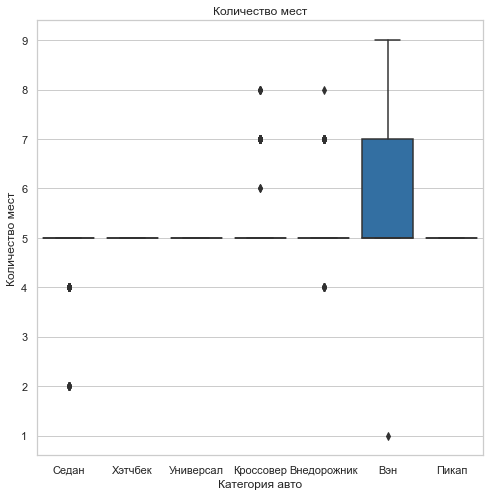

In [54]:
draw_boxplot((8,8),x_data=autos.category,y_data=autos.seats, hue=None,\
                     palette='Blues', title='Количество мест',\
                     x_label='Категория авто',y_label='Количество мест')

Здесь в глаза бросается одноместный вэн, для автомобиля, рассчитанного на перевозку большого количества людей иметь 1 место это странно. Посмотрим, что это за машина.

In [55]:
autos[autos['seats']==1]

,brand,model,complect,type_car,seats,doors,category,class,engine_volume,engine_type,...,trunk_volume_max,fuel_tank_volume,auto_weight,speed_100,fuel_cons_city,fuel_cons_freeway,fuel_cons_mixed,auto_lenght,auto_widht,auto_height
1431,Toyota,Hiace,3.0D MT Standart,Вэн,1,3,Вэн,0,2755,дизельный,...,1935,70,2125,0.0,0.0,0.0,0.0,5915,1950,2280


проверим, есть ли у нас другие автомобили этой марки

In [56]:
autos[autos['model']=='Hiace']

,brand,model,complect,type_car,seats,doors,category,class,engine_volume,engine_type,...,trunk_volume_max,fuel_tank_volume,auto_weight,speed_100,fuel_cons_city,fuel_cons_freeway,fuel_cons_mixed,auto_lenght,auto_widht,auto_height
1431,Toyota,Hiace,3.0D MT Standart,Вэн,1,3,Вэн,0,2755,дизельный,...,1935,70,2125,0.0,0.0,0.0,0.0,5915,1950,2280
1432,Toyota,Hiace,3.0D AT Elegance,Вэн,9,5,Вэн,0,2755,дизельный,...,1935,70,2125,0.0,0.0,0.0,0.0,5300,1970,1990
1433,Toyota,Hiace,3.0D AT Prestige Safety,Вэн,9,5,Вэн,0,2755,дизельный,...,1935,70,2125,0.0,0.0,0.0,0.0,5300,1970,1990


Остальные автомобили марки Hiace имеют 9 мест, поэтому заменим 1 на 9. Здесь возможно ошибка ввода данных

In [57]:
autos.loc[(autos['model']=='Hiace')&(autos['seats']==1),'seats']=9

Посмотрим на распределение по категориям заново:

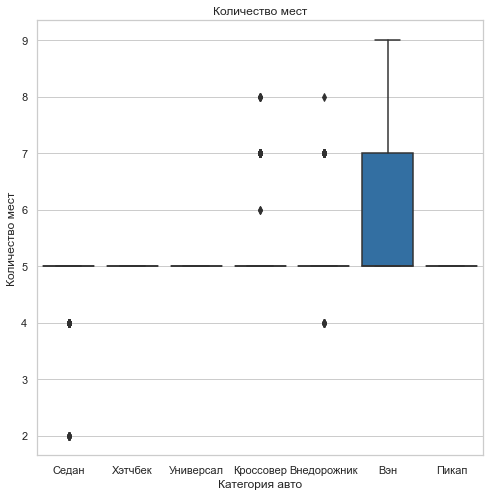

In [58]:
draw_boxplot((8,8),x_data=autos.category,y_data=autos.seats, hue=None,\
                     palette='Blues', title='Количество мест',\
                     x_label='Категория авто',y_label='Количество мест')

Заметно, что у всех автомоблилей количество мест равно 5, только у вэнов медиана выше, т.к. автомобиль больше и количество мест может доходить до 9.

Посмотрим подробнее на Седаны

In [59]:
autos_filtered=autos[autos['category']=='Седан']

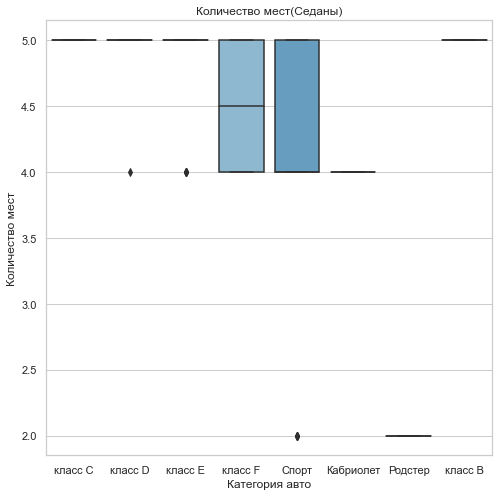

In [60]:
draw_boxplot((8,8),x_data=autos_filtered['class'], y_data=autos_filtered['seats'], hue=None,\
                     palette='Blues', title='Количество мест(Седаны)',\
                     x_label='Категория авто',y_label='Количество мест')

Здесь видно, что есть спортивные авто с 2 места, скорее всего их следовало бы отнести к типу родстеров, однако большая чать седанов имеет от 4 до 5 мест.

Посмотрим на выбросы в кроссоверах

In [61]:
autos_filtered=autos[autos['category']=='Кроссовер']

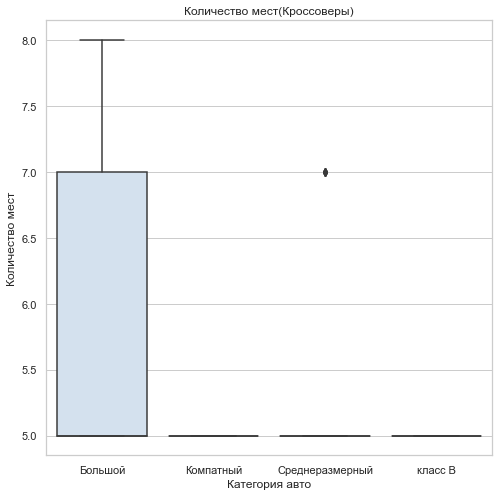

In [62]:
draw_boxplot((8,8),x_data=autos_filtered['class'], y_data=autos_filtered['seats'], hue=None,\
                     palette='Blues', title='Количество мест(Кроссоверы)',\
                     x_label='Категория авто',y_label='Количество мест')

Здесь видно, что большие машины могут иметь и больше мест. Проверим, что это за среднеразмерный кроссовер с 7ю местами

In [63]:
autos_filtered[(autos_filtered['seats']==7)&(autos_filtered['class']=='Среднеразмерный')]

,brand,model,complect,type_car,seats,doors,category,class,engine_volume,engine_type,...,trunk_volume_max,fuel_tank_volume,auto_weight,speed_100,fuel_cons_city,fuel_cons_freeway,fuel_cons_mixed,auto_lenght,auto_widht,auto_height
704,KIA,Sorento,2.5 Prestige AWD 6AT,Среднеразмерный кроссовер,7,5,Кроссовер,Среднеразмерный,2497,бензиновый,...,821,67,1779,10.3,12.0,0.0,8.9,4810,1900,1690
705,KIA,Sorento,2.2D Premium AWD 8DCT,Среднеразмерный кроссовер,7,5,Кроссовер,Среднеразмерный,2151,дизельный,...,821,67,1997,9.2,7.4,5.3,6.1,4810,1900,1690
706,KIA,Sorento,2.2D Premium+ AWD 8DCT,Среднеразмерный кроссовер,7,5,Кроссовер,Среднеразмерный,2151,дизельный,...,821,67,1997,9.2,7.4,5.3,6.1,4810,1900,1690
963,Lexus,RX,350L AWD Premium,Среднеразмерный кроссовер,7,5,Кроссовер,Среднеразмерный,3456,бензиновый,...,1626,72,2165,8.1,12.0,6.9,9.0,5000,1895,1720
967,Lexus,RX,350L AWD Exclusive,Среднеразмерный кроссовер,7,5,Кроссовер,Среднеразмерный,3456,бензиновый,...,1626,72,2165,8.1,12.0,6.9,9.0,5000,1895,1720
1104,Mitsubishi,Outlander,Intense+ 2.0 CVT AWD 7s,Среднеразмерный кроссовер,7,5,Кроссовер,Среднеразмерный,1998,бензиновый,...,1754,60,1490,11.7,9.8,6.6,7.7,4695,1810,1703
1108,Mitsubishi,Outlander,Ultimate 2.4 CVT AWD 7s,Среднеразмерный кроссовер,7,5,Кроссовер,Среднеразмерный,2360,бензиновый,...,1640,60,1505,10.2,10.0,6.5,7.8,4695,1810,1703
1305,Skoda,Kodiaq,Sportline 2.0 TDI 4x4,Среднеразмерный кроссовер,7,5,Кроссовер,Среднеразмерный,1968,дизельный,...,1980,60,1709,9.9,7.7,5.2,6.2,4697,1882,1655
1306,Skoda,Kodiaq,Sportline 2.0 TSI 4x4,Среднеразмерный кроссовер,7,5,Кроссовер,Среднеразмерный,1984,бензиновый,...,1980,60,1695,8.0,9.1,6.4,7.4,4697,1882,1655


Скорее всего у данных автомобилей за счет багажника можно организовать дополнительный ряд пасажирских мест.

In [64]:
autos_filtered=autos[autos['category']=='Внедорожник']

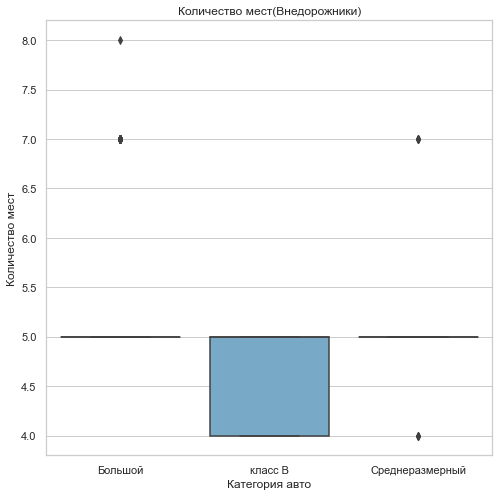

In [65]:
draw_boxplot((8,8),x_data=autos_filtered['class'], y_data=autos_filtered['seats'], hue=None,\
                     palette='Blues', title='Количество мест(Внедорожники)',\
                     x_label='Категория авто',y_label='Количество мест')

Здесь видно, что у больших машин количество мест может доходить и до 8, однако медианное значение 5 мест.

Посмторим, если ли что-то необычное в данных по дверям:

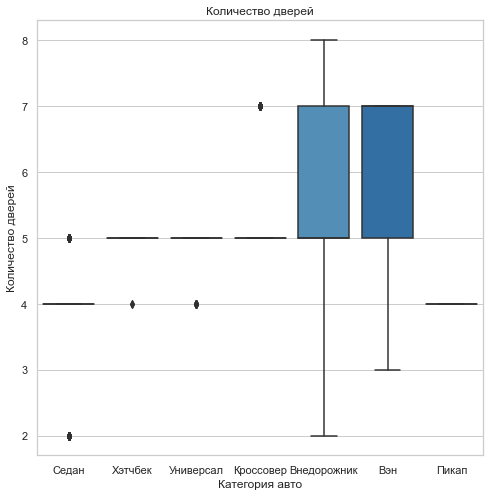

In [66]:
draw_boxplot((8,8),x_data=autos['category'], y_data=autos['doors'], hue=None,\
                     palette='Blues', title='Количество дверей',\
                     x_label='Категория авто',y_label='Количество дверей')

Число дверей никак не связано с типом авто, видно что в средней все автомобили имеют от 4 до 5 дверей, однако в каждой группе могут быть выбросы в засисимости от марки и комплектации авто. 
Здесь стоит обратить внимание на вэн с 3 дверьми, т.к. обычно данный тип машин имеет миниум 4.

In [67]:
autos[(autos['category']=='Вэн')&(autos['doors']<4)]

,brand,model,complect,type_car,seats,doors,category,class,engine_volume,engine_type,...,trunk_volume_max,fuel_tank_volume,auto_weight,speed_100,fuel_cons_city,fuel_cons_freeway,fuel_cons_mixed,auto_lenght,auto_widht,auto_height
1431,Toyota,Hiace,3.0D MT Standart,Вэн,9,3,Вэн,0,2755,дизельный,...,1935,70,2125,0.0,0.0,0.0,0.0,5915,1950,2280


In [68]:
autos[(autos['model']=='Hiace')]

,brand,model,complect,type_car,seats,doors,category,class,engine_volume,engine_type,...,trunk_volume_max,fuel_tank_volume,auto_weight,speed_100,fuel_cons_city,fuel_cons_freeway,fuel_cons_mixed,auto_lenght,auto_widht,auto_height
1431,Toyota,Hiace,3.0D MT Standart,Вэн,9,3,Вэн,0,2755,дизельный,...,1935,70,2125,0.0,0.0,0.0,0.0,5915,1950,2280
1432,Toyota,Hiace,3.0D AT Elegance,Вэн,9,5,Вэн,0,2755,дизельный,...,1935,70,2125,0.0,0.0,0.0,0.0,5300,1970,1990
1433,Toyota,Hiace,3.0D AT Prestige Safety,Вэн,9,5,Вэн,0,2755,дизельный,...,1935,70,2125,0.0,0.0,0.0,0.0,5300,1970,1990


У данных Тойот 5 дверей, поэтому заменим 3 на 5.

In [69]:
autos.loc[(autos['model']=='Hiace')&(autos['doors']<5),'doors']=5

Посмотрим на данные по двигателям:

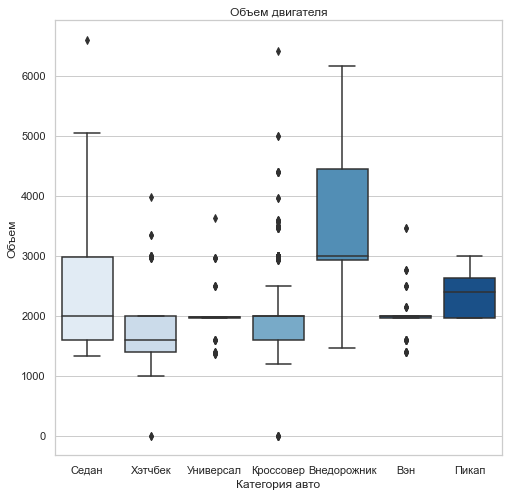

In [70]:
draw_boxplot((8,8),x_data=autos['category'], y_data=autos['engine_volume'], hue=None,\
                     palette='Blues', title='Объем двигателя',\
                     x_label='Категория авто',y_label='Объем')

У внедорожников и пикапов объем двигателя в среднем выше, чем у остальных категорий.

In [71]:
sedan_auto=autos[autos['category']=='Седан']
cross_auto=autos[autos['category']=='Кроссовер']
offw_auto=autos[autos['category']=='Внедорожник']
un_auto=autos[autos['category']=='Универсал']
wen_auto=autos[autos['category']=='Вэн']
picup_auto=autos[autos['category']=='Пикап']

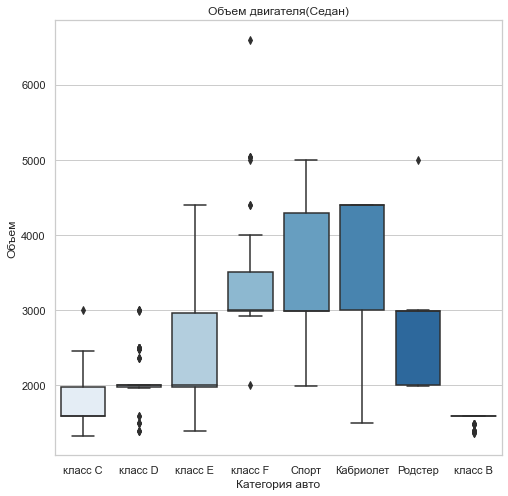

In [72]:
draw_boxplot((8,8),x_data=sedan_auto['class'], y_data=autos['engine_volume'], hue=None,\
                     palette='Blues', title='Объем двигателя(Седан)',\
                     x_label='Категория авто',y_label='Объем')

Видно, что у представительских авто и спортивных машин объем двигателя в среднем выше, чем у остальных и может превышать 6000.

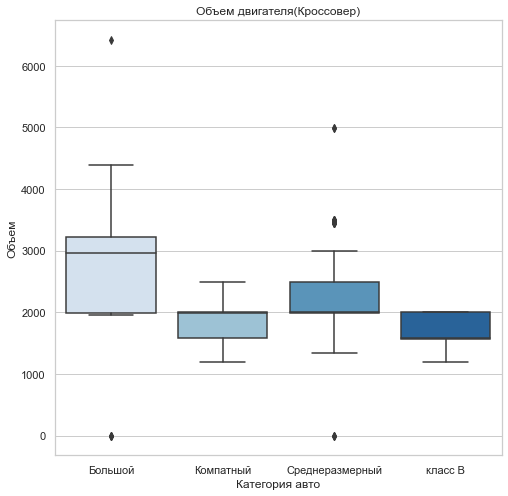

In [73]:
draw_boxplot((8,8),x_data=cross_auto['class'], y_data=cross_auto['engine_volume'], hue=None,\
                     palette='Blues', title='Объем двигателя(Кроссовер)',\
                     x_label='Категория авто',y_label='Объем')

Здесь также видно, что чем больше машина, тем больше ее объемы двигателя

Посмотрим, как тип машины и ее класс влияет на мощность:

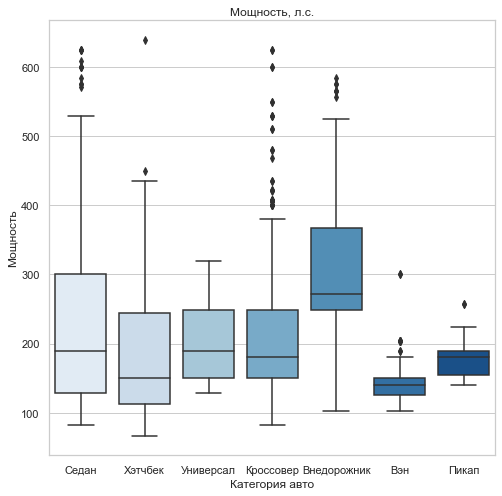

In [74]:
draw_boxplot((8,8),x_data=autos['category'], y_data=autos['power'], hue=None,\
                     palette='Blues', title='Мощность, л.с.',\
                     x_label='Категория авто',y_label='Мощность')

Видно, что внедорожники в целом имеют большую мощность, чем остальные, а вэны наоборот менее мощные.Седаны, кроссоверы, универсалы и хэтчбеки в целом имеют примерно одинаковые показатели.

Посмотрим на выбросы в седанах, внедорожниках и кроссоверах.

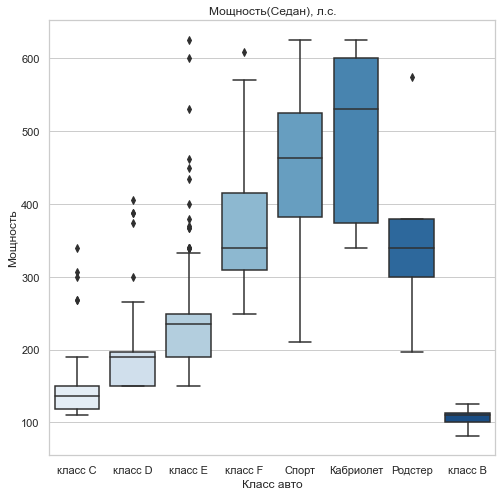

In [75]:
draw_boxplot((8,8),x_data=sedan_auto['class'], y_data=sedan_auto['power'], hue=None,\
                     palette='Blues', title='Мощность(Седан), л.с.',\
                     x_label='Класс авто',y_label='Мощность')

В целом заметно, что спортивные авто, кабриолеты, родстеры и представительский класс мощнее остальных. Самый немощный класс-это седаны В, далее с повышением класс идет увеличение мощности.

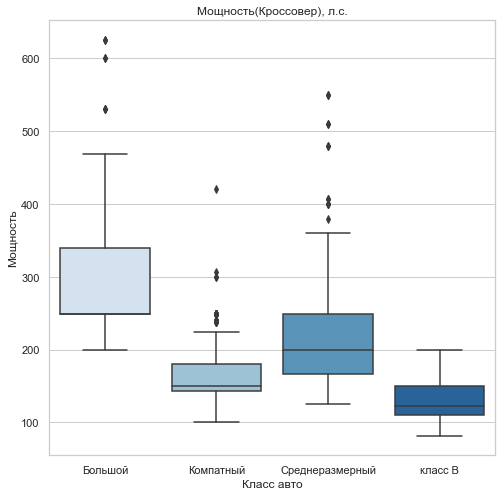

In [76]:
draw_boxplot((8,8),x_data=cross_auto['class'], y_data=cross_auto['power'], hue=None,\
                     palette='Blues', title='Мощность(Кроссовер), л.с.',\
                     x_label='Класс авто',y_label='Мощность')

Здесь также можно заметить, что с увеличением размеров увеличивается и мощность двигателя.

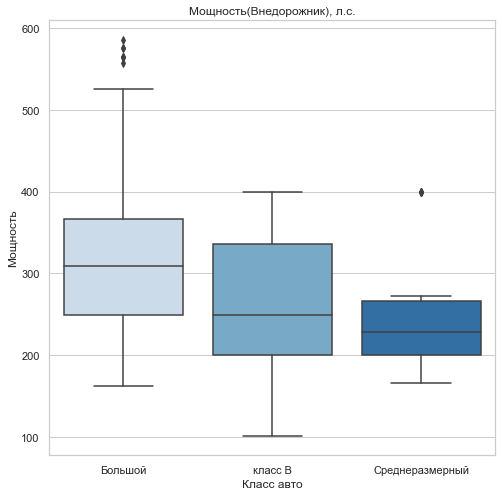

In [77]:
draw_boxplot((8,8),x_data=offw_auto['class'], y_data=offw_auto['power'], hue=None,\
                     palette='Blues', title='Мощность(Внедорожник), л.с.',\
                     x_label='Класс авто',y_label='Мощность')

Аналогично, чем больше машина, тем больше мощность двигателяю

Посмотрим, как распределен крутящий момент

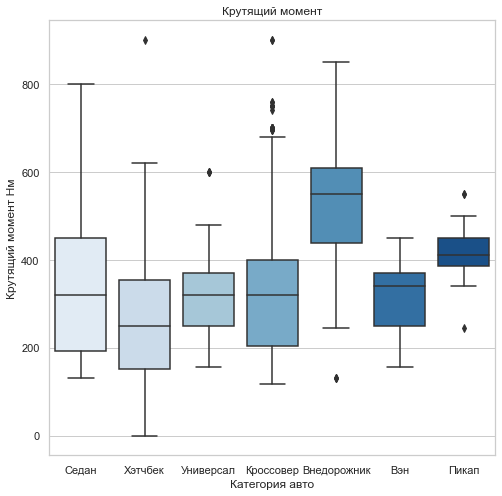

In [78]:
draw_boxplot((8,8),x_data=autos['category'], y_data=autos['driving_moment'], hue=None,\
                     palette='Blues', title='Крутящий момент',\
                     x_label='Категория авто',y_label='Крутящий момент Нм')

У внедорожников и пикапов крутящий момент в целом  выше, чем у остальных типов авто, а у хетчбеков наоборот ниже.
Посмотрим по типам авто:

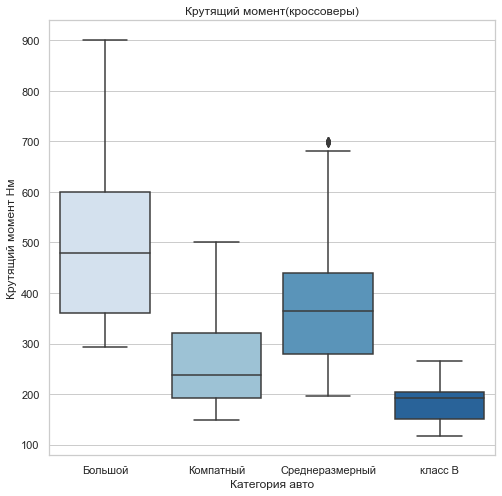

In [79]:
draw_boxplot((8,8),x_data=cross_auto['class'], y_data=cross_auto['driving_moment'], hue=None,\
                     palette='Blues', title='Крутящий момент(кроссоверы)',\
                     x_label='Категория авто',y_label='Крутящий момент Нм')

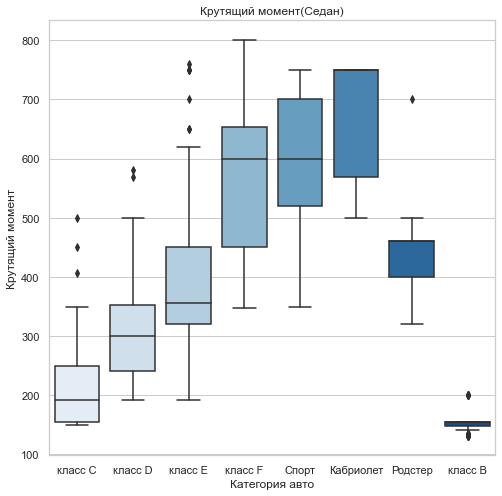

In [80]:
draw_boxplot((8,8),x_data=sedan_auto['class'], y_data=sedan_auto['driving_moment'], hue=None,\
                     palette='Blues', title='Крутящий момент(Седан)',\
                     x_label='Категория авто',y_label='Крутящий момент')

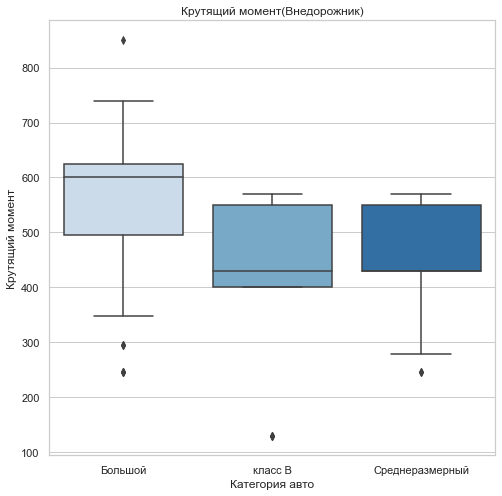

In [81]:
draw_boxplot((8,8),x_data=offw_auto['class'], y_data=offw_auto['driving_moment'], hue=None,\
                     palette='Blues', title='Крутящий момент(Внедорожник)',\
                     x_label='Категория авто',y_label='Крутящий момент')

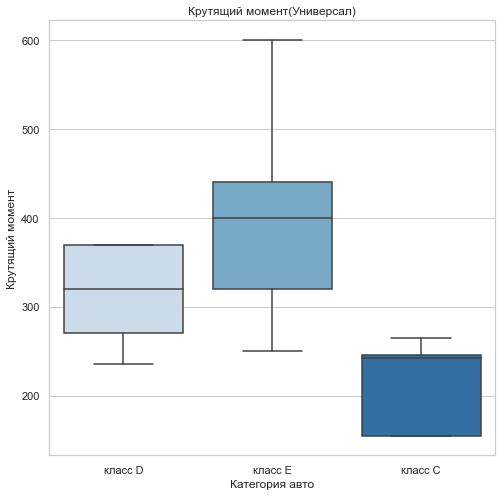

In [82]:
draw_boxplot((8,8),x_data=un_auto['class'], y_data=un_auto['driving_moment'], hue=None,\
                     palette='Blues', title='Крутящий момент(Универсал)',\
                     x_label='Категория авто',y_label='Крутящий момент')

Здесь также можно заметить, что крутящий момент увеличивается с повышением класса или размера автомобиля.

Посмотрим на распределение скоростей:

In [83]:
autos.max_speed.describe()

count    1703.000000
mean      207.581914
std        31.897643
min         0.000000
25%       186.000000
50%       205.000000
75%       230.000000
max       322.000000
Name: max_speed, dtype: float64

Проверим, кто не может разогнаться до 0

In [84]:
autos[autos.max_speed<=0]

,brand,model,complect,type_car,seats,doors,category,class,engine_volume,engine_type,...,trunk_volume_max,fuel_tank_volume,auto_weight,speed_100,fuel_cons_city,fuel_cons_freeway,fuel_cons_mixed,auto_lenght,auto_widht,auto_height
575,Jeep,Compass,Longitude,Компактный кроссовер,5,5,Кроссовер,Компатный,2360,бензиновый,...,1693,60,1542,0.0,13.0,7.2,9.6,4394,2033,1644
576,Jeep,Compass,Limited,Компактный кроссовер,5,5,Кроссовер,Компатный,2360,бензиновый,...,1693,60,1552,0.0,13.0,7.2,9.6,4394,2033,1644
577,Jeep,Compass,Trailhawk,Компактный кроссовер,5,5,Кроссовер,Компатный,2360,бензиновый,...,1693,60,1644,0.0,13.0,7.6,9.9,4394,2033,1660
587,Jeep,Wrangler 2D,2.0 AT8 Sport,Внедорожник класса B,4,2,Внедорожник,класс B,1995,бензиновый,...,430,66,1819,0.0,0.0,0.0,0.0,4334,1894,1858
588,Jeep,Wrangler 2D,2.0 AT8 Sahara,Внедорожник класса B,4,2,Внедорожник,класс B,1995,бензиновый,...,430,66,1819,0.0,0.0,0.0,0.0,4334,1894,1878
589,Jeep,Wrangler 2D,2.0 AT8 Rubicon,Внедорожник класса B,4,2,Внедорожник,класс B,1995,бензиновый,...,430,66,1819,0.0,0.0,0.0,0.0,4334,1894,1879
590,Jeep,Wrangler 4D,2.0 AT8 Sport,Среднеразмерный внедорожник,4,4,Внедорожник,Среднеразмерный,1995,бензиновый,...,1044,81,1960,0.0,0.0,0.0,0.0,4882,1894,1881
591,Jeep,Wrangler 4D,2.0 AT8 Sahara,Среднеразмерный внедорожник,4,4,Внедорожник,Среднеразмерный,1995,бензиновый,...,1044,81,1960,0.0,0.0,0.0,0.0,4882,1894,1891
592,Jeep,Wrangler 4D,2.0 AT8 Rubicon,Среднеразмерный внедорожник,4,4,Внедорожник,Среднеразмерный,1995,бензиновый,...,1044,81,1960,0.0,0.0,0.0,0.0,4882,1894,1901


Посмотрим, есть ли у нас данные по максимальной скорости по другим автомобилям Compass и Wrangler

In [85]:
autos[autos.model=='Compass']

,brand,model,complect,type_car,seats,doors,category,class,engine_volume,engine_type,...,trunk_volume_max,fuel_tank_volume,auto_weight,speed_100,fuel_cons_city,fuel_cons_freeway,fuel_cons_mixed,auto_lenght,auto_widht,auto_height
575,Jeep,Compass,Longitude,Компактный кроссовер,5,5,Кроссовер,Компатный,2360,бензиновый,...,1693,60,1542,0.0,13.0,7.2,9.6,4394,2033,1644
576,Jeep,Compass,Limited,Компактный кроссовер,5,5,Кроссовер,Компатный,2360,бензиновый,...,1693,60,1552,0.0,13.0,7.2,9.6,4394,2033,1644
577,Jeep,Compass,Trailhawk,Компактный кроссовер,5,5,Кроссовер,Компатный,2360,бензиновый,...,1693,60,1644,0.0,13.0,7.6,9.9,4394,2033,1660


Для модели Compass данных нет.

In [86]:
autos[(autos.model=='Wrangler 2D') | (autos.model=='Wrangler 4D') ]

,brand,model,complect,type_car,seats,doors,category,class,engine_volume,engine_type,...,trunk_volume_max,fuel_tank_volume,auto_weight,speed_100,fuel_cons_city,fuel_cons_freeway,fuel_cons_mixed,auto_lenght,auto_widht,auto_height
587,Jeep,Wrangler 2D,2.0 AT8 Sport,Внедорожник класса B,4,2,Внедорожник,класс B,1995,бензиновый,...,430,66,1819,0.0,0.0,0.0,0.0,4334,1894,1858
588,Jeep,Wrangler 2D,2.0 AT8 Sahara,Внедорожник класса B,4,2,Внедорожник,класс B,1995,бензиновый,...,430,66,1819,0.0,0.0,0.0,0.0,4334,1894,1878
589,Jeep,Wrangler 2D,2.0 AT8 Rubicon,Внедорожник класса B,4,2,Внедорожник,класс B,1995,бензиновый,...,430,66,1819,0.0,0.0,0.0,0.0,4334,1894,1879
590,Jeep,Wrangler 4D,2.0 AT8 Sport,Среднеразмерный внедорожник,4,4,Внедорожник,Среднеразмерный,1995,бензиновый,...,1044,81,1960,0.0,0.0,0.0,0.0,4882,1894,1881
591,Jeep,Wrangler 4D,2.0 AT8 Sahara,Среднеразмерный внедорожник,4,4,Внедорожник,Среднеразмерный,1995,бензиновый,...,1044,81,1960,0.0,0.0,0.0,0.0,4882,1894,1891
592,Jeep,Wrangler 4D,2.0 AT8 Rubicon,Среднеразмерный внедорожник,4,4,Внедорожник,Среднеразмерный,1995,бензиновый,...,1044,81,1960,0.0,0.0,0.0,0.0,4882,1894,1901


Информации по данным моделям нет. Заменим 0 медианой по типу автомобиля:

In [87]:
autos.loc[autos.model=='Compass','max_speed']=autos[autos.type_car=='Компактный кроссовер']['max_speed'].median()
autos.loc[autos.model=='Wrangler 2D','max_speed']=autos[autos.type_car=='Внедорожник класса B']['max_speed'].median()
autos.loc[autos.model=='Wrangler 4D','max_speed']=autos[autos.type_car=='Среднеразмерный внедорожник']['max_speed'].median()

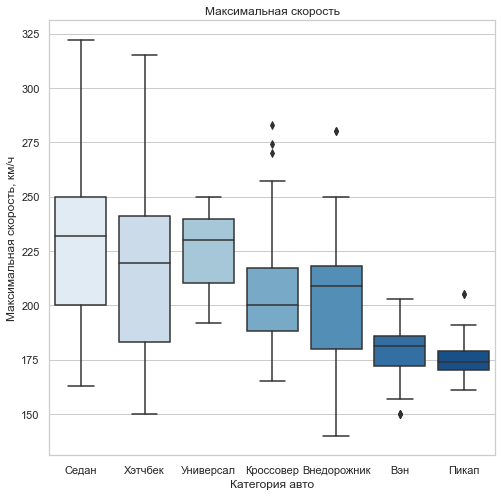

In [88]:
draw_boxplot((8,8),x_data=autos['category'], y_data=autos['max_speed'], hue=None,\
                     palette='Blues', title='Максимальная скорость',\
                     x_label='Категория авто',y_label='Максимальная скорость, км/ч')

Здесь можно выделить 3 группы: самые медленные это вэны и пикапы, средние-кроссоверы и внедорожники, а самые быстрые это хэтчбеки, седаны и универсалы.

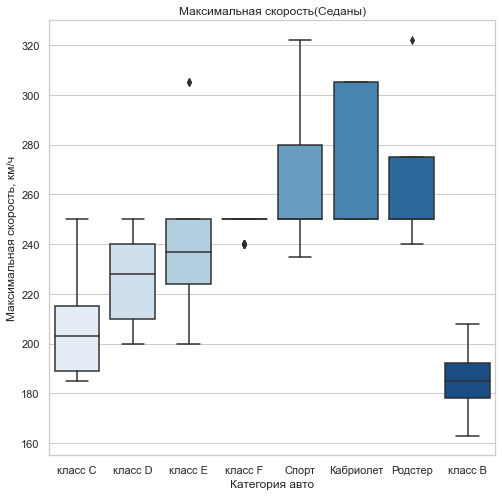

In [89]:
draw_boxplot((8,8),x_data=sedan_auto['class'], y_data=sedan_auto['max_speed'], hue=None,\
                     palette='Blues', title='Максимальная скорость(Седаны)',\
                     x_label='Категория авто',y_label='Максимальная скорость, км/ч')

Видно, что чем выше класс, тем больше скорость(для авто, у которых есть класс). Спортивные авто, родстеры и кабриолеты являются самыми быстрыми среди седанов.

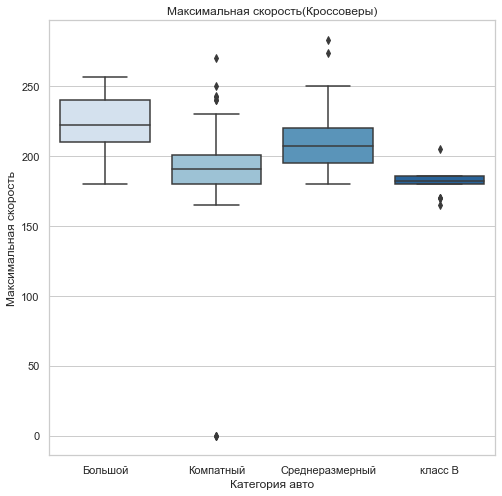

In [90]:
draw_boxplot((8,8),x_data=cross_auto['class'], y_data=cross_auto['max_speed'], hue=None,\
                     palette='Blues', title='Максимальная скорость(Кроссоверы)',\
                     x_label='Категория авто',y_label='Максимальная скорость')

В кроссоверах можно заметить, что с увеличением размера растет и максимальная скорость.

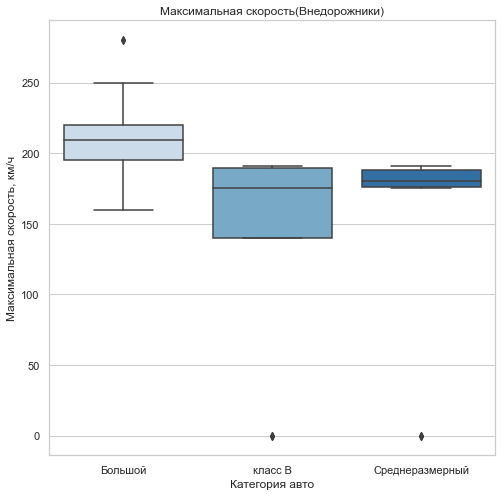

In [91]:
draw_boxplot((8,8),x_data=offw_auto['class'], y_data=offw_auto['max_speed'], hue=None,\
                     palette='Blues', title='Максимальная скорость(Внедорожники)',\
                     x_label='Категория авто',y_label='Максимальная скорость, км/ч')

Аналогичная ситуация во внедорожниках, где максимальная скорость больших машин выше, чем у среднеразмерных или класса В.

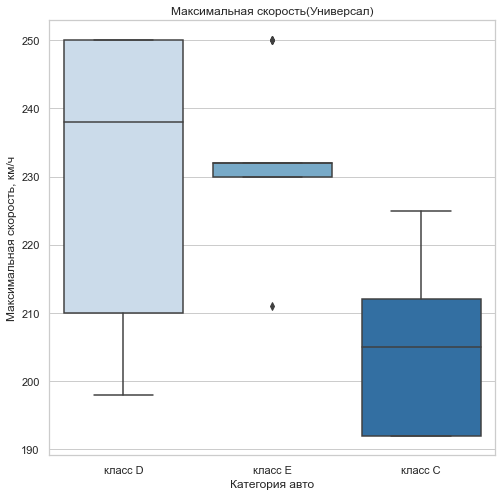

In [92]:
draw_boxplot((8,8),x_data=un_auto['class'], y_data=un_auto['max_speed'], hue=None,\
                     palette='Blues', title='Максимальная скорость(Универсал)',\
                     x_label='Категория авто',y_label='Максимальная скорость, км/ч')

У универсалов тоже можно заметить, что максимальная скорость связана с классом автомобиля и чем выше класс, тем выше и скорость.

Посмотрим какие авто и как разгоняются до 100 км/ч

In [93]:
autos['speed_100'].describe()

count    1703.000000
mean        8.424369
std         2.953567
min         0.000000
25%         6.600000
50%         8.600000
75%        10.600000
max        17.600000
Name: speed_100, dtype: float64

Посмотрим у каких авто 0е значения

In [94]:
autos[autos['speed_100']==0].groupby(['brand','model','type_car'])['type_car'].count()

brand       model               type_car                   
Genesis     G80                 Седан класса E                  3
Jeep        Compass             Компактный кроссовер            3
            Wrangler 2D         Внедорожник класса B            3
            Wrangler 4D         Среднеразмерный внедорожник     3
Lexus       NX                  Компактный кроссовер            1
Mitsubishi  L200                Пикап                           5
Suzuki      Jimny               Внедорожник класса B            3
Toyota      Fortuner            Среднеразмерный внедорожник     2
            Hiace               Вэн                             3
            Highlander          Большой кроссовер               2
            Hilux               Пикап                           3
            Land Cruiser Prado  Большой внедорожник             6
Volkswagen  Multivan            Вэн                            29
            Passat              Седан класса D                  5
Name: type_car, 

In [95]:
autos[autos['brand']=='Genesis'].groupby(['brand','model','type_car'])['speed_100'].median()

brand    model  type_car         
Genesis  G70    Седан класса D       8.30
         G80    Седан класса E       7.40
         G90    Седан класса F       6.25
         GV80   Большой кроссовер    7.50
Name: speed_100, dtype: float64

In [96]:
autos[autos['brand']=='Lexus'].groupby(['brand','model','type_car'])['speed_100'].median()

brand  model   type_car                 
Lexus  ES      Седан класса E               9.1
       GX      Большой внедорожник          8.3
       LC 500  Спорткупе                    4.7
       LS      Седан класса F               4.9
       LX      Большой внедорожник          7.7
       NX      Компактный кроссовер         7.1
       RX      Среднеразмерный кроссовер    8.1
       UX      Компактный кроссовер         9.2
Name: speed_100, dtype: float64

In [97]:
autos[autos['brand']=='Mitsubishi'].groupby(['brand','model','type_car'])['speed_100'].median()

brand       model          type_car                   
Mitsubishi  ASX            Компактный кроссовер           11.40
            Eclipse Cross  Компактный кроссовер           11.25
            L200           Пикап                           0.00
            Outlander      Среднеразмерный кроссовер      11.10
            Pajero Sport   Среднеразмерный внедорожник    12.00
Name: speed_100, dtype: float64

In [98]:
autos[autos['brand']=='Toyota'].groupby(['brand','model','type_car'])['speed_100'].median()

brand   model               type_car                   
Toyota  Alphard             Минивэн                         8.30
        C-HR                Компактный кроссовер           11.20
        Camry               Седан класса E                  9.90
        Corolla             Седан класса C                 10.80
        Fortuner            Среднеразмерный внедорожник     6.00
        Hiace               Вэн                             0.00
        Highlander          Большой кроссовер               0.00
        Hilux               Пикап                           0.00
        Land Cruiser 200    Большой внедорожник             8.75
        Land Cruiser Prado  Большой внедорожник             8.80
        RAV4                Компактный кроссовер           10.40
Name: speed_100, dtype: float64

In [99]:
autos[autos['brand']=='Volkswagen'].groupby(['brand','model','type_car'])['speed_100'].median()

brand       model              type_car            
Volkswagen  Amarok             Пикап                   10.90
            Arteon             Хэтчбек класса D         7.70
            Caddy              Компактвэн              10.60
            Caddy Maxi         Компактвэн              10.60
            Jetta              Седан класса C          12.00
            Multivan           Вэн                      0.00
            Passat             Седан класса D           0.00
            Polo Liftback      Седан класса B          11.05
            Polo Sedan (2010)  Седан класса B          11.20
            Teramont           Большой кроссовер        8.60
            Tiguan             Компактный кроссовер     8.70
            Tiguan (2016)      Компактный кроссовер     9.20
            Touareg            Большой внедорожник      6.80
Name: speed_100, dtype: float64

In [100]:
autos[autos['brand']=='Jeep'].groupby(['brand','model','type_car'])['speed_100'].median()

brand  model                type_car                   
Jeep   Compass              Компактный кроссовер           0.00
       Grand Cherokee       Большой внедорожник            9.05
       Grand Cherokee SRT8  Большой кроссовер              5.00
       Renegade             Компактный кроссовер           9.65
       Wrangler 2D          Внедорожник класса B           0.00
       Wrangler 4D          Среднеразмерный внедорожник    0.00
Name: speed_100, dtype: float64

Для Genesis и Lexus заполним имеющимися данным, остальные 0 заполним медианным значением по типу авто:

In [101]:
autos.loc[(autos['model']=='G80')&(autos['speed_100']==0),'speed_100']=7.40
autos.loc[(autos['model']=='NX')&(autos['speed_100']==0),'speed_100']=7.10

In [102]:
autos['max_speed']=autos.groupby('type_car')['max_speed'].transform(lambda x: x.replace(0, int(x.mean())))

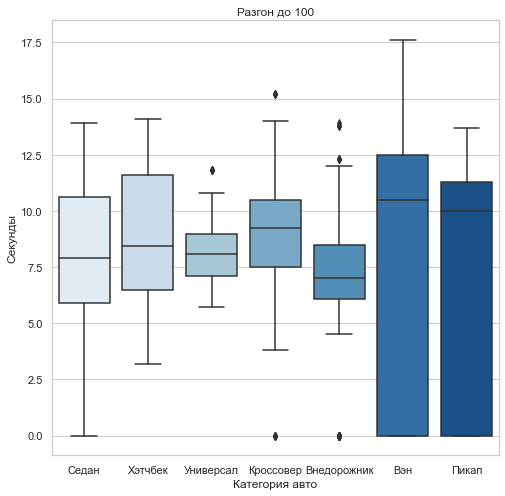

In [103]:
draw_boxplot((8,8),x_data=autos['category'], y_data=autos['speed_100'], hue=None,\
                     palette='Blues', title='Разгон до 100',\
                     x_label='Категория авто',y_label='Секунды')

В целом можно заметить, что кроссоверам и внедорожникам нужно быльше времени, седанам и хэтчбекам для разгона. Дольше всего разгоняются универсалы. 

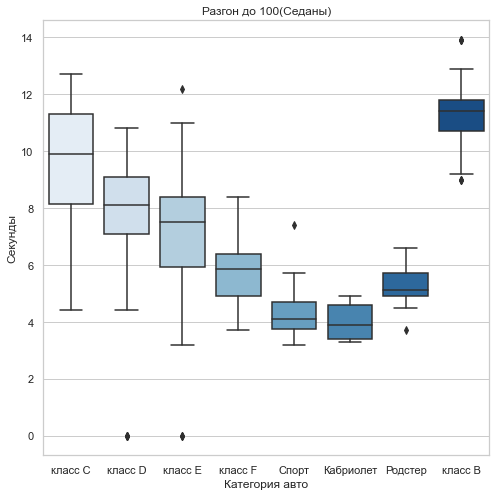

In [104]:
draw_boxplot((8,8),x_data=sedan_auto['class'], y_data=sedan_auto['speed_100'], hue=None,\
                     palette='Blues', title='Разгон до 100(Седаны)',\
                     x_label='Категория авто',y_label='Секунды')

Заметно, что чем выше класс седана, тем быстрее он разгоняется до 100. Самые быстрые родстреры, спортивные и кабриолеты.

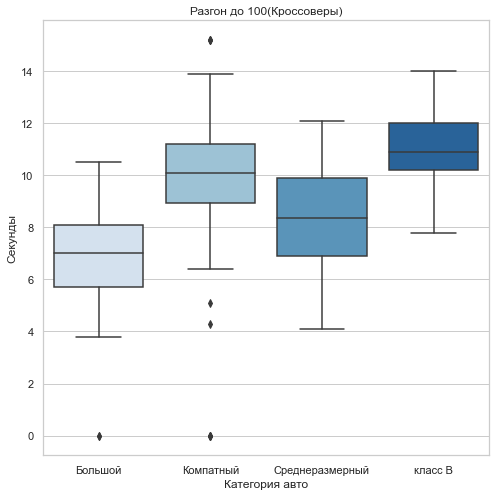

In [105]:
draw_boxplot((8,8),x_data=cross_auto['class'], y_data=cross_auto['speed_100'], hue=None,\
                     palette='Blues', title='Разгон до 100(Кроссоверы)',\
                     x_label='Категория авто',y_label='Секунды')

Здесь видно, что чем больше кроссовер, тем быстрее он разгоняется до 100.

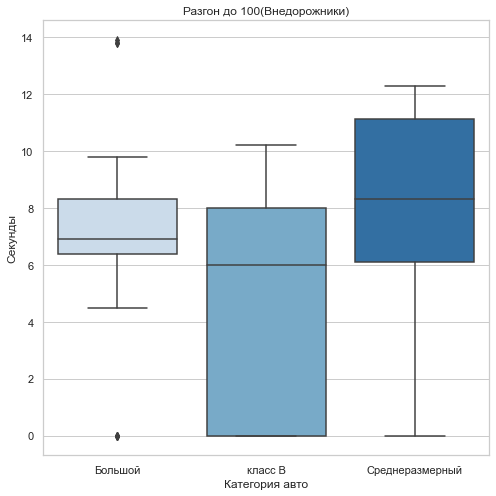

In [106]:
draw_boxplot((8,8),x_data=offw_auto['class'], y_data=offw_auto['speed_100'], hue=None,\
                     palette='Blues', title='Разгон до 100(Внедорожники)',\
                     x_label='Категория авто',y_label='Секунды')

Аналогичная ситуация и у внедорожников, чем больше, тем быстрее разгоняется до 100.

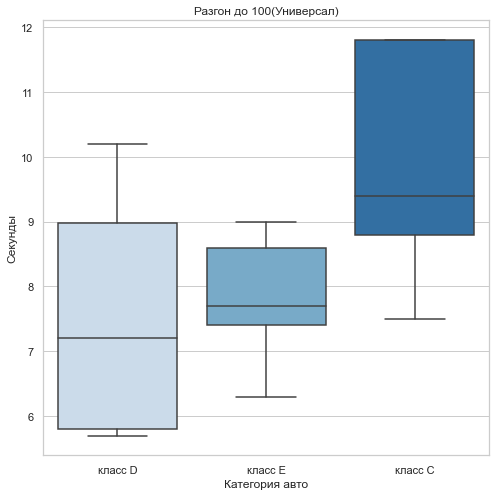

In [107]:
draw_boxplot((8,8),x_data=un_auto['class'], y_data=un_auto['speed_100'], hue=None,\
                     palette='Blues', title='Разгон до 100(Универсал)',\
                     x_label='Категория авто',y_label='Секунды')

У универсалов D и Е классы разгоняются быстрее, чем С, однако прослеживаемой зависимости нет.

Посмотрим как распределены показатели дорожного просвета

In [108]:
autos['road_clearance'].describe()

count    1703.000000
mean      176.041691
std        47.857125
min         0.000000
25%       155.000000
50%       184.000000
75%       210.000000
max       291.000000
Name: road_clearance, dtype: float64

Посмотрим у каких машин 0й дорожный просвет и попробуем заменить 0 подходящими значениями.

In [109]:
autos[autos['road_clearance']==0].groupby(['brand','model','type_car'])['road_clearance'].median()

brand          model         type_car                
Audi           A6            Седан класса E              0
               A6 Avant      Универсал класса E          0
               Q7            Большой кроссовер           0
               S6            Седан класса E              0
               S7 Sportback  Хэтчбек класса E            0
               SQ7           Большой кроссовер           0
               SQ8           Большой кроссовер           0
Mercedes-Benz  A             Хэтчбек класса C            0
               A AMG         Горячий хэтчбек класса C    0
               A Sedan       Седан класса C              0
               E Coupe       Купе класса E               0
               E Sedan       Седан класса E              0
               GLS           Большой внедорожник         0
               Maybach GLS   Большой внедорожник         0
               V             Вэн                         0
Name: road_clearance, dtype: int32

In [110]:
autos[autos['brand']=='Audi'].groupby(['brand','model','type_car'])['road_clearance'].median()

brand  model         type_car                                  
Audi   A3 Sedan      Седан класса C                                165
       A3 Sportback  Хэтчбек класса B                              140
       A4            Седан класса D                                160
       A4 Allroad    Универсал повышенной проходимости класса D    180
       A4 Avant      Универсал класса D                            160
       A5            Купе класса D                                 160
       A5 Sportback  Хэтчбек класса D                              160
       A6            Седан класса E                                  0
       A6 Avant      Универсал класса E                              0
       A7 Sportback  Хэтчбек класса E                              120
       A8            Седан класса F                                120
       Q3            Компактный кроссовер                          170
       Q3 Sportback  Компактный кроссовер                          170
       Q5    

In [111]:
autos[autos['brand']=='Mercedes-Benz'].groupby(['brand','model','type_car'])['road_clearance'].median()

brand          model            type_car                 
Mercedes-Benz  A                Хэтчбек класса C               0
               A AMG            Горячий хэтчбек класса C       0
               A Sedan          Седан класса C                 0
               C AMG            Спортседан класса D          150
               C AMG Сoupe      Спорткупе класса D           150
               C Coupe          Купе класса D                150
               C Sedan          Седан класса D               150
               CLA              Седан класса C               104
               CLS              Седан класса E                93
               E Coupe          Купе класса E                  0
               E Sedan          Седан класса E                 0
               G 5D             Большой внедорожник          241
               G 63 AMG         Большой внедорожник          241
               GLA              Компактный кроссовер         187
               GLA AMG          

Заменим 0 в дорожных просветах медианным значением по полю type_car

In [112]:
autos['road_clearance']=autos.groupby('type_car')['road_clearance'].transform(lambda x: x.replace(0, int(x.mean())))

In [113]:
autos[autos['road_clearance']==0].groupby(['brand','model','type_car'])['road_clearance'].median()

brand          model    type_car     
Mercedes-Benz  E Coupe  Купе класса E    0
Name: road_clearance, dtype: int32

Заменим пропуск у купе класса Е значением просвета у купе Мерседесов класса D, 150 мм

In [114]:
autos.loc[(autos.brand=='Mercedes-Benz')&(autos.type_car=='Купе класса E'),'road_clearance']=150

In [115]:
autos['road_clearance']=autos.groupby('type_car')['road_clearance'].transform(lambda x: x.replace(0, int(x.mean())))

In [116]:
sedan_auto=autos[autos['category']=='Седан']
cross_auto=autos[autos['category']=='Кроссовер']
offw_auto=autos[autos['category']=='Внедорожник']
un_auto=autos[autos['category']=='Универсал']
wen_auto=autos[autos['category']=='Вэн']
picup_auto=autos[autos['category']=='Пикап']

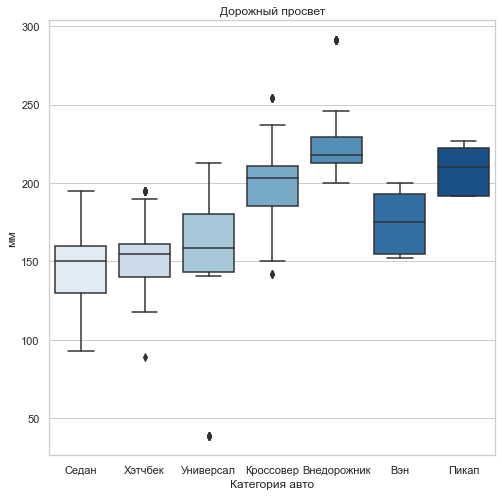

In [117]:
draw_boxplot((8,8),x_data=autos['category'], y_data=autos['road_clearance'], hue=None,\
                     palette='Blues', title='Дорожный просвет',\
                     x_label='Категория авто',y_label='мм')

Заметно, что у кроссоверов и внедорожников дорожный просвет выше, а у седанов, хетчбеков и универсалов ниже.

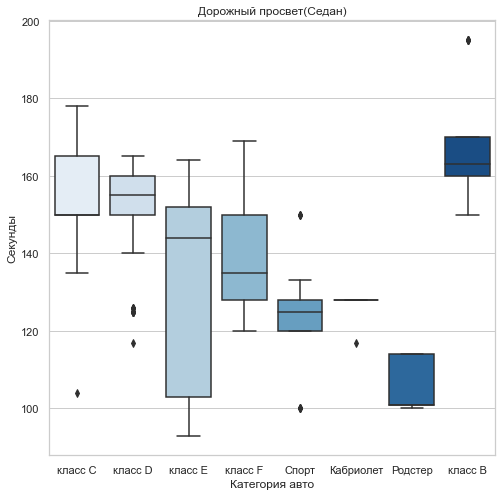

In [118]:
draw_boxplot((8,8),x_data=sedan_auto['class'], y_data=sedan_auto['road_clearance'], hue=None,\
                     palette='Blues', title='Дорожный просвет(Седан)',\
                     x_label='Категория авто',y_label='Секунды')

У спортивных машин, кабриолетов и родстеров дорожный просвет в среднем ниже, чем у остальных.

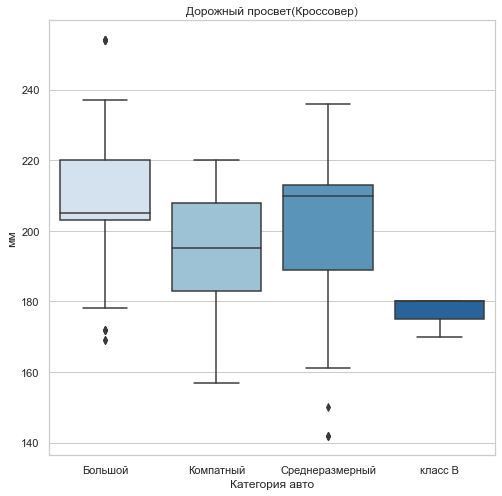

In [119]:
draw_boxplot((8,8),x_data=cross_auto['class'], y_data=cross_auto['road_clearance'], hue=None,\
                     palette='Blues', title='Дорожный просвет(Кроссовер)',\
                     x_label='Категория авто',y_label='мм')

У кроссоверов видно, что чем больше размер кроссовера, тем выше дорожный просвет.

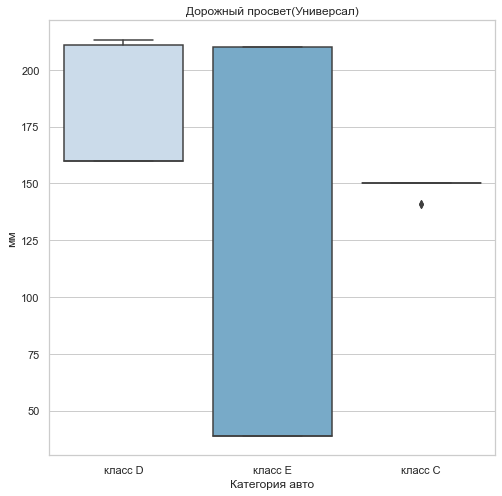

In [120]:
draw_boxplot((8,8),x_data=un_auto['class'], y_data=un_auto['road_clearance'], hue=None,\
                     palette='Blues', title='Дорожный просвет(Универсал)',\
                     x_label='Категория авто',y_label='мм')

У универсалов сложно увидеть связь между классом и высотой просвета.

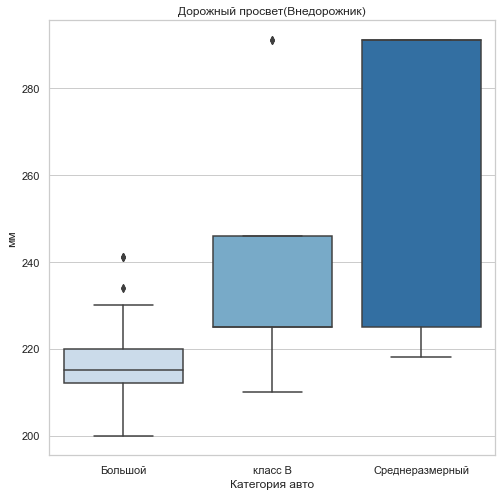

In [121]:
draw_boxplot((8,8),x_data=offw_auto['class'], y_data=offw_auto['road_clearance'], hue=None,\
                     palette='Blues', title='Дорожный просвет(Внедорожник)',\
                     x_label='Категория авто',y_label='мм')

У внедорожников заметно, что величина дорожного просвета обратно пропорциональна размерам, чем больше машина, тем меньше просвет.

Посмотрим на габариты автомобилей

In [122]:
autos.auto_height.describe()

count    1703.000000
mean     1620.227833
std       165.189194
min        17.000000
25%      1474.000000
50%      1630.000000
75%      1715.000000
max      2280.000000
Name: auto_height, dtype: float64

Заметно, что есть автомобили с высотой 17мм, это явная ошибка. Найдем это авто и посмотрим, чем можно заменить значение

In [123]:
autos[autos['auto_height']==17]

,brand,model,complect,type_car,seats,doors,category,class,engine_volume,engine_type,...,trunk_volume_max,fuel_tank_volume,auto_weight,speed_100,fuel_cons_city,fuel_cons_freeway,fuel_cons_mixed,auto_lenght,auto_widht,auto_height
1154,Nissan,X-Trail,XE 2.0 MT6,Среднеразмерный кроссовер,5,5,Кроссовер,Среднеразмерный,1997,бензиновый,...,1982,60,1445,11.1,11.0,6.6,8.3,4690,1820,17


Найдем все Xtrail  и посмотрим какая у них высота

In [124]:
autos[autos['model']=='X-Trail']

,brand,model,complect,type_car,seats,doors,category,class,engine_volume,engine_type,...,trunk_volume_max,fuel_tank_volume,auto_weight,speed_100,fuel_cons_city,fuel_cons_freeway,fuel_cons_mixed,auto_lenght,auto_widht,auto_height
1154,Nissan,X-Trail,XE 2.0 MT6,Среднеразмерный кроссовер,5,5,Кроссовер,Среднеразмерный,1997,бензиновый,...,1982,60,1445,11.1,11.0,6.6,8.3,4690,1820,17
1155,Nissan,X-Trail,XE+ 2.0 CVT AWD,Среднеразмерный кроссовер,5,5,Кроссовер,Среднеразмерный,1997,бензиновый,...,1982,60,1566,12.1,9.4,6.4,7.5,4690,1820,1715
1156,Nissan,X-Trail,SE 2.0 CVT,Среднеразмерный кроссовер,5,5,Кроссовер,Среднеразмерный,1997,бензиновый,...,1982,60,1480,11.7,9.0,6.1,7.1,4690,1820,1715
1157,Nissan,X-Trail,SE Yandex 2.0 CVT,Среднеразмерный кроссовер,5,5,Кроссовер,Среднеразмерный,1997,бензиновый,...,1982,60,1480,11.7,9.0,6.1,7.1,4690,1820,1715
1158,Nissan,X-Trail,SE 2.0 CVT AWD,Среднеразмерный кроссовер,5,5,Кроссовер,Среднеразмерный,1997,бензиновый,...,1982,60,1566,12.1,9.4,6.4,7.5,4690,1820,1715
1159,Nissan,X-Trail,SE Yandex 2.0 CVT AWD,Среднеразмерный кроссовер,5,5,Кроссовер,Среднеразмерный,1997,бензиновый,...,1982,60,1566,12.1,9.4,6.4,7.5,4690,1820,1715
1160,Nissan,X-Trail,SE 1.6d MT6,Среднеразмерный кроссовер,5,5,Кроссовер,Среднеразмерный,1598,дизельный,...,1982,60,1600,11.0,6.2,4.8,5.3,4690,1820,1715
1161,Nissan,X-Trail,SE Yandex 1.6d MT6,Среднеразмерный кроссовер,5,5,Кроссовер,Среднеразмерный,1598,дизельный,...,1982,60,1600,11.0,6.2,4.8,5.3,4690,1820,1715
1162,Nissan,X-Trail,SE 2.5 CVT AWD,Среднеразмерный кроссовер,5,5,Кроссовер,Среднеразмерный,2488,бензиновый,...,1982,60,1586,10.5,11.0,6.6,8.3,4690,1820,1715
1163,Nissan,X-Trail,SE Yandex 2.5 CVT AWD,Среднеразмерный кроссовер,5,5,Кроссовер,Среднеразмерный,2488,бензиновый,...,1982,60,1586,10.5,11.0,6.6,8.3,4690,1820,1715


Заменим 17 на 1715

In [125]:
autos.loc[autos['auto_height']==17,'auto_height']=1715

In [126]:
sedan_auto=autos[autos['category']=='Седан']
cross_auto=autos[autos['category']=='Кроссовер']
offw_auto=autos[autos['category']=='Внедорожник']
un_auto=autos[autos['category']=='Универсал']
wen_auto=autos[autos['category']=='Вэн']
picup_auto=autos[autos['category']=='Пикап']

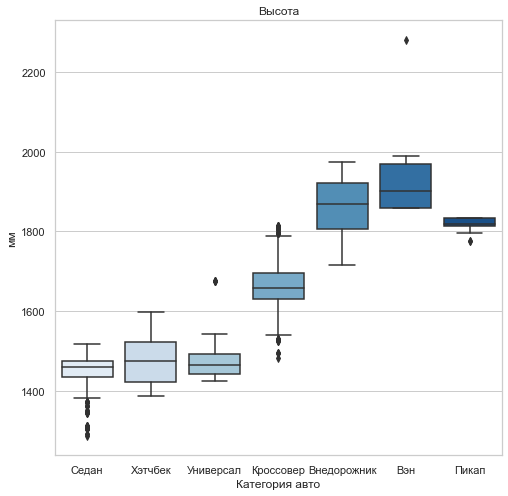

In [127]:
draw_boxplot((8,8),x_data=autos['category'], y_data=autos['auto_height'], hue=None,\
                     palette='Blues', title='Высота',\
                     x_label='Категория авто',y_label='мм')

Здесь также можно заметить, что есть связь между категорией машини и ее высотой.

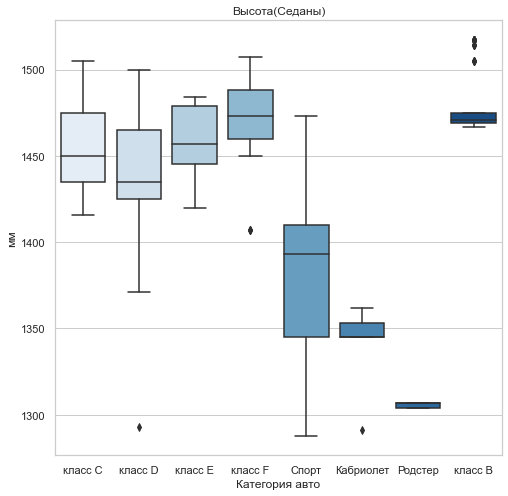

In [128]:
draw_boxplot((8,8),x_data=sedan_auto['class'], y_data=sedan_auto['auto_height'], hue=None,\
                     palette='Blues', title='Высота(Седаны)',\
                     x_label='Категория авто',y_label='мм')

Среди седанов явной закономерности выявитьт не удалось, здесь можно увидеть, что спортивные авто, родстеры и кабриолеты ниже остальных автомобилей.

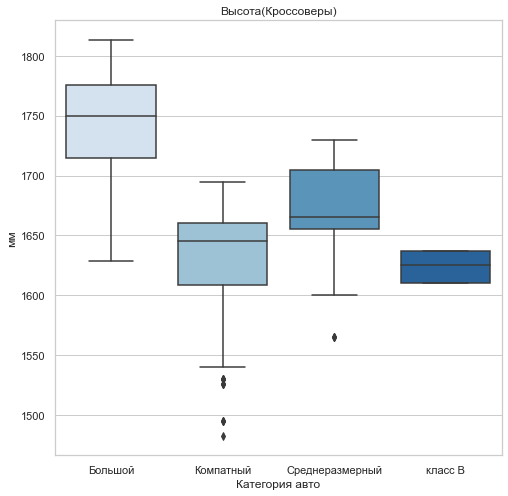

In [129]:
draw_boxplot((8,8),x_data=cross_auto['class'], y_data=cross_auto['auto_height'], hue=None,\
                     palette='Blues', title='Высота(Кроссоверы)',\
                     x_label='Категория авто',y_label='мм')

Чем больше кроссовер, тем больше высота.

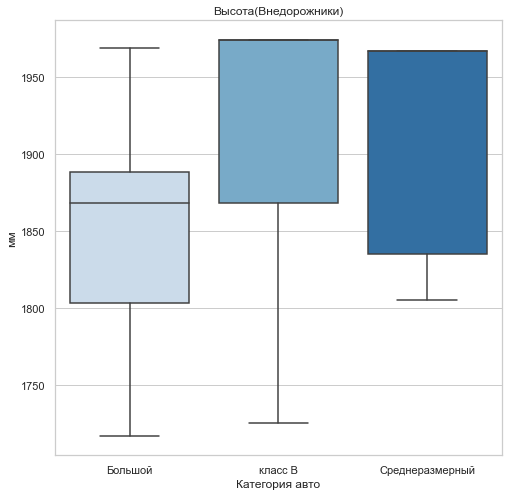

In [130]:
draw_boxplot((8,8),x_data=offw_auto['class'], y_data=offw_auto['auto_height'], hue=None,\
                     palette='Blues', title='Высота(Внедорожники)',\
                     x_label='Категория авто',y_label='мм')

А вот у внедорожников прямой зависимости нет.

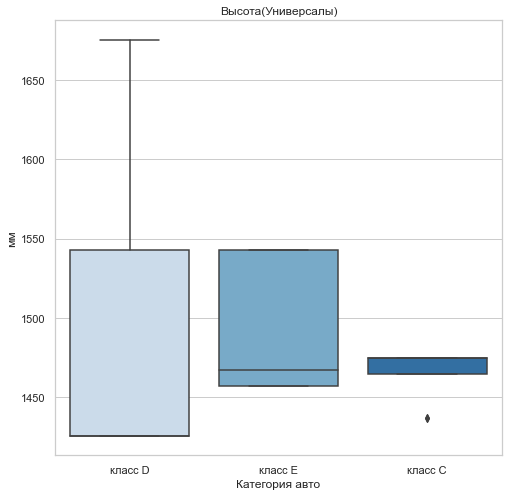

In [131]:
draw_boxplot((8,8),x_data=un_auto['class'], y_data=un_auto['auto_height'], hue=None,\
                     palette='Blues', title='Высота(Универсалы)',\
                     x_label='Категория авто',y_label='мм')

У универсалов аналогично высота никак с классом не связана.

In [132]:
autos['auto_widht'].describe()

count    1703.000000
mean     1877.691133
std        92.999923
min      1595.000000
25%      1815.000000
50%      1860.000000
75%      1937.000000
max      2157.000000
Name: auto_widht, dtype: float64

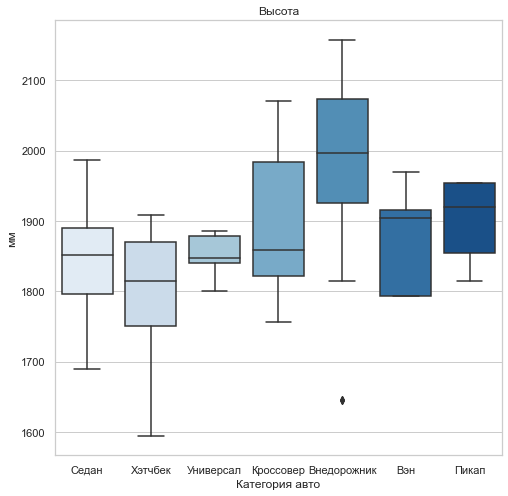

In [133]:
draw_boxplot((8,8),x_data=autos['category'], y_data=autos['auto_widht'], hue=None,\
                     palette='Blues', title='Высота',\
                     x_label='Категория авто',y_label='мм')

Здесь также можно заметить, что внедорожники, вэны и пикапы в среднем шире, чем седаны, хэтчбеки, универсалы и кроссоверы

In [134]:
sedan_auto=autos[autos['category']=='Седан']
cross_auto=autos[autos['category']=='Кроссовер']
offw_auto=autos[autos['category']=='Внедорожник']
un_auto=autos[autos['category']=='Универсал']
wen_auto=autos[autos['category']=='Вэн']
picup_auto=autos[autos['category']=='Пикап']

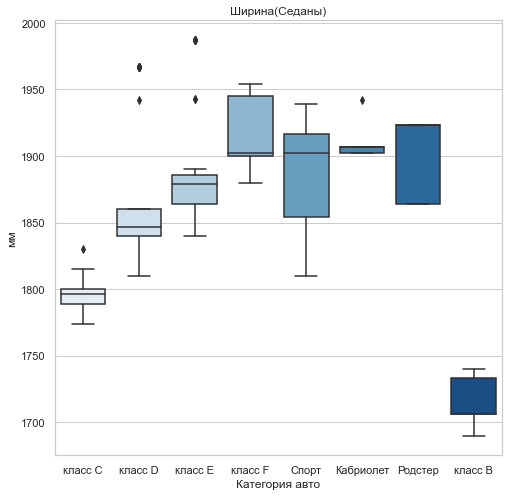

In [135]:
draw_boxplot((8,8),x_data=sedan_auto['class'], y_data=sedan_auto['auto_widht'], hue=None,\
                     palette='Blues', title='Ширина(Седаны)',\
                     x_label='Категория авто',y_label='мм')

Среди седанов заметно, что с повышением класса растет и ширина авто. Спортивные, кабриолеты и родстеры образуют отдельную группу.

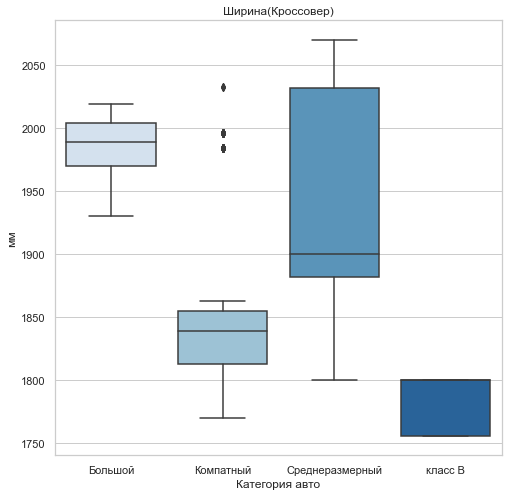

In [136]:
draw_boxplot((8,8),x_data=cross_auto['class'], y_data=cross_auto['auto_widht'], hue=None,\
                     palette='Blues', title='Ширина(Кроссовер)',\
                     x_label='Категория авто',y_label='мм')

Аналогично, среди кроссоверов можно увидеть, что чем больше кроссовер, тем больше ширина.

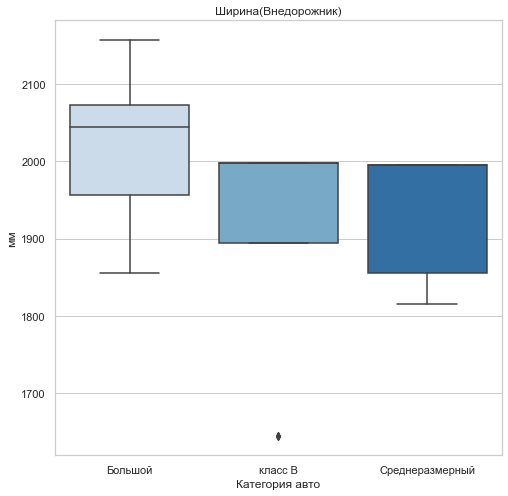

In [137]:
draw_boxplot((8,8),x_data=offw_auto['class'], y_data=offw_auto['auto_widht'], hue=None,\
                     palette='Blues', title='Ширина(Внедорожник)',\
                     x_label='Категория авто',y_label='мм')

Аналогичная ситуация с внедорожниками, чем больше машина, тем она шире.

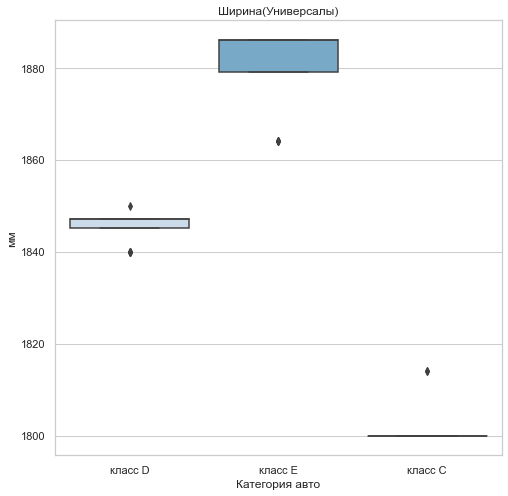

In [138]:
draw_boxplot((8,8),x_data=un_auto['class'], y_data=un_auto['auto_widht'], hue=None,\
                     palette='Blues', title='Ширина(Универсалы)',\
                     x_label='Категория авто',y_label='мм')

Среди универсалов, чем выше класс, тем шире машина.

In [139]:
autos['auto_lenght'].describe()

count    1703.000000
mean     4696.175573
std       303.426368
min      3595.000000
25%      4447.000000
50%      4697.000000
75%      4933.000000
max      5915.000000
Name: auto_lenght, dtype: float64

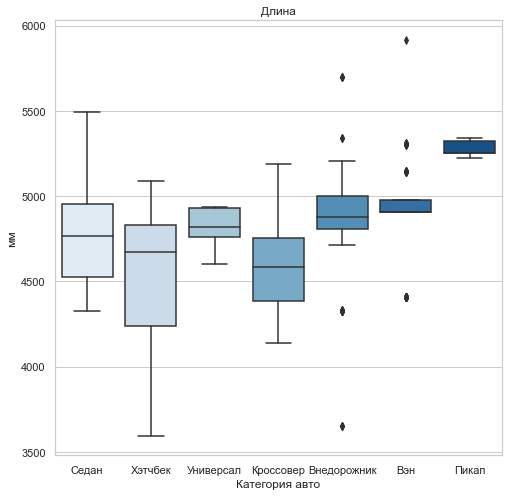

In [140]:
draw_boxplot((8,8),x_data=autos['category'], y_data=autos['auto_lenght'], hue=None,\
                     palette='Blues', title='Длина',\
                     x_label='Категория авто',y_label='мм')

Здесь строгой связи между типом авто и его длиной не видно, все автомобили в среднем имеют длину 4.5-5 метров. Видно, что пикапы в среднем длинее других авто.

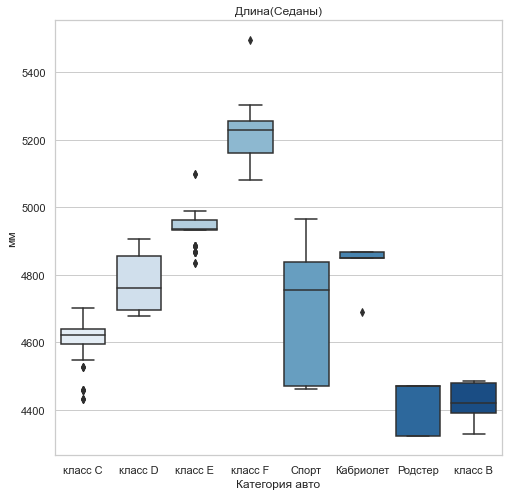

In [141]:
draw_boxplot((8,8),x_data=sedan_auto['class'], y_data=sedan_auto['auto_lenght'], hue=None,\
                     palette='Blues', title='Длина(Седаны)',\
                     x_label='Категория авто',y_label='мм')

У седанов можно увидеть закономерность, что с ростом класса растеи и длина авто. родстеры, кабриолеты и спортивные авто стоят отдельной категорией.

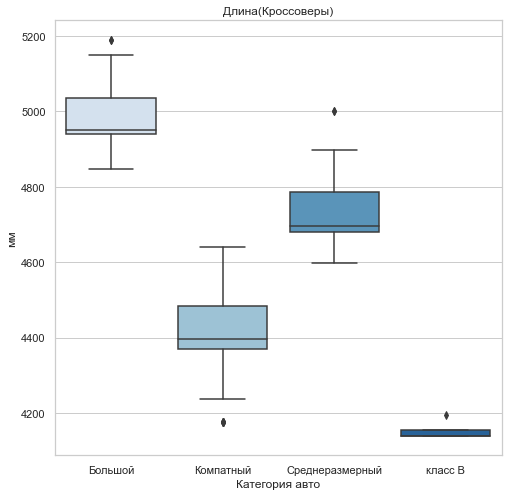

In [142]:
draw_boxplot((8,8),x_data=cross_auto['class'], y_data=cross_auto['auto_lenght'], hue=None,\
                     palette='Blues', title='Длина(Кроссоверы)',\
                     x_label='Категория авто',y_label='мм')

У кроссоверов можно заметить, больше размер-больше длина.

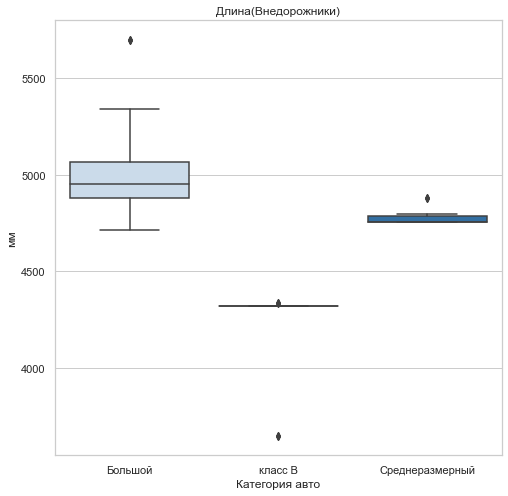

In [143]:
draw_boxplot((8,8),x_data=offw_auto['class'], y_data=offw_auto['auto_lenght'], hue=None,\
                     palette='Blues', title='Длина(Внедорожники)',\
                     x_label='Категория авто',y_label='мм')

Чем больше внедорожник, тем больше длина.

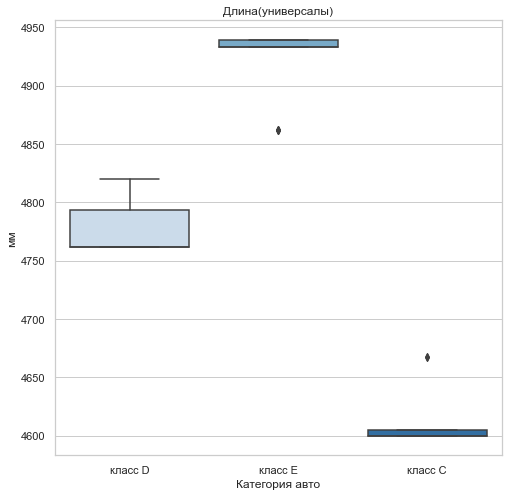

In [144]:
draw_boxplot((8,8),x_data=un_auto['class'], y_data=un_auto['auto_lenght'], hue=None,\
                     palette='Blues', title='Длина(универсалы)',\
                     x_label='Категория авто',y_label='мм')

У универсалов с повышением класса также растет длина.

Проверим данные по объемам багажника

In [145]:
autos['trunk_volume'].describe()

count    1703.000000
mean      501.521433
std       191.732100
min         0.000000
25%       428.000000
50%       505.000000
75%       571.000000
max      1900.000000
Name: trunk_volume, dtype: float64

Посмотрим какие авто имеют 0й объем багажника

In [146]:
autos[autos['trunk_volume']==0].groupby(['brand','model','type_car'])['trunk_volume'].median()

brand          model     type_car      
Lexus          ES        Седан класса E    0
               LC 500    Спорткупе         0
Mercedes-Benz  X         Пикап             0
Mitsubishi     L200      Пикап             0
Toyota         Hiace     Вэн               0
               Hilux     Пикап             0
Volkswagen     Amarok    Пикап             0
               Multivan  Вэн               0
Name: trunk_volume, dtype: int32

In [147]:
autos[autos['brand']=='Lexus'].groupby(['brand','model','type_car'])['trunk_volume'].median()

brand  model   type_car                 
Lexus  ES      Седан класса E                 0
       GX      Большой внедорожник          621
       LC 500  Спорткупе                      0
       LS      Седан класса F               480
       LX      Большой внедорожник          701
       NX      Компактный кроссовер         555
       RX      Среднеразмерный кроссовер    553
       UX      Компактный кроссовер         272
Name: trunk_volume, dtype: int32

In [148]:
autos[autos['brand']=='Mercedes-Benz'].groupby(['brand','model','type_car'])['trunk_volume'].median()

brand          model            type_car                 
Mercedes-Benz  A                Хэтчбек класса C              370.0
               A AMG            Горячий хэтчбек класса C      370.0
               A Sedan          Седан класса C                420.0
               C AMG            Спортседан класса D           457.5
               C AMG Сoupe      Спорткупе класса D            377.5
               C Coupe          Купе класса D                 400.0
               C Sedan          Седан класса D                480.0
               CLA              Седан класса C                460.0
               CLS              Седан класса E                490.0
               E Coupe          Купе класса E                 405.0
               E Sedan          Седан класса E                540.0
               G 5D             Большой внедорожник           480.0
               G 63 AMG         Большой внедорожник           480.0
               GLA              Компактный кроссовер      

In [149]:
autos[autos['brand']=='Mitsubishi'].groupby(['brand','model','type_car'])['trunk_volume'].median()

brand       model          type_car                   
Mitsubishi  ASX            Компактный кроссовер           384
            Eclipse Cross  Компактный кроссовер           341
            L200           Пикап                            0
            Outlander      Среднеразмерный кроссовер      591
            Pajero Sport   Среднеразмерный внедорожник    500
Name: trunk_volume, dtype: int32

In [150]:
autos[autos['brand']=='Toyota'].groupby(['brand','model','type_car'])['trunk_volume'].median()

brand   model               type_car                   
Toyota  Alphard             Минивэн                        1900
        C-HR                Компактный кроссовер            297
        Camry               Седан класса E                  493
        Corolla             Седан класса C                  470
        Fortuner            Среднеразмерный внедорожник     297
        Hiace               Вэн                               0
        Highlander          Большой кроссовер               454
        Hilux               Пикап                             0
        Land Cruiser 200    Большой внедорожник             909
        Land Cruiser Prado  Большой внедорожник             621
        RAV4                Компактный кроссовер            580
Name: trunk_volume, dtype: int32

In [151]:
autos[autos['brand']=='Volkswagen'].groupby(['brand','model','type_car'])['trunk_volume'].median()

brand       model              type_car            
Volkswagen  Amarok             Пикап                     0
            Arteon             Хэтчбек класса D        563
            Caddy              Компактвэн              190
            Caddy Maxi         Компактвэн              530
            Jetta              Седан класса C          510
            Multivan           Вэн                       0
            Passat             Седан класса D          586
            Polo Liftback      Седан класса B          530
            Polo Sedan (2010)  Седан класса B          460
            Teramont           Большой кроссовер       330
            Tiguan             Компактный кроссовер    615
            Tiguan (2016)      Компактный кроссовер    615
            Touareg            Большой внедорожник     810
Name: trunk_volume, dtype: int32

Внутри марок найти аналогичные модели не удалось, заполним 0 медианным значением в целом по типу машины.

In [152]:
autos['trunk_volume']=autos.groupby('type_car')['trunk_volume'].transform(lambda x:x.replace(0, int(x.mean())))

In [153]:
autos[autos['trunk_volume']==0].groupby(['brand','model','type_car'])['trunk_volume'].median()

brand          model   type_car
Mercedes-Benz  X       Пикап       0
Mitsubishi     L200    Пикап       0
Toyota         Hilux   Пикап       0
Volkswagen     Amarok  Пикап       0
Name: trunk_volume, dtype: int32

У нас остались пикапы с 0 объемом, скорее всего потому что у пикапов есть кузов, а багажника нет.

In [154]:
sedan_auto=autos[autos['category']=='Седан']
cross_auto=autos[autos['category']=='Кроссовер']
offw_auto=autos[autos['category']=='Внедорожник']
un_auto=autos[autos['category']=='Универсал']
wen_auto=autos[autos['category']=='Вэн']
picup_auto=autos[autos['category']=='Пикап']

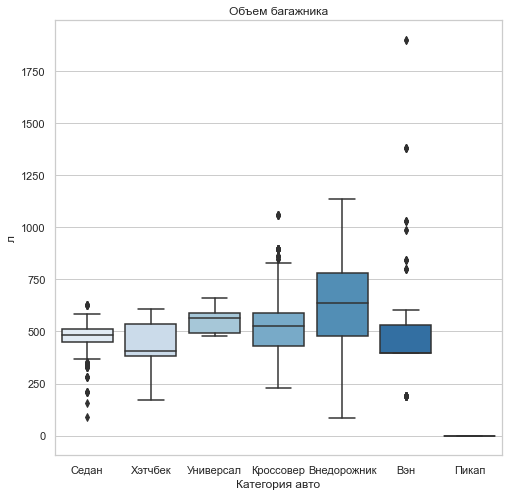

In [155]:
draw_boxplot((8,8),x_data=autos['category'], y_data=autos['trunk_volume'], hue=None,\
                     palette='Blues', title='Объем багажника',\
                     x_label='Категория авто',y_label='л')

Здесь можно увидеть, что объемы багажников внедорожников и универсалов выше, чем у остальных авто.

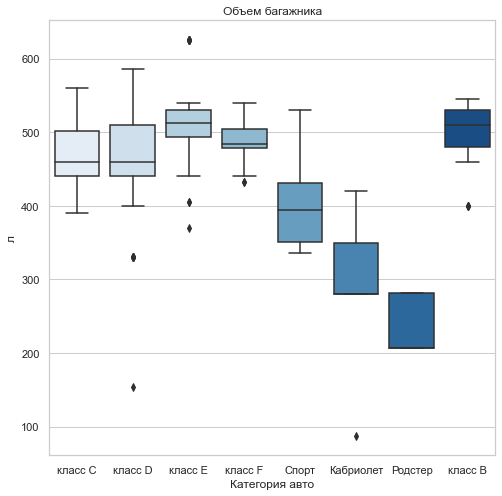

In [156]:
draw_boxplot((8,8),x_data=sedan_auto['class'], y_data=sedan_auto['trunk_volume'], hue=None,\
                     palette='Blues', title='Объем багажника',\
                     x_label='Категория авто',y_label='л')

Здесь также нет прямой зависимости между классом авто и объемом багажника. Можно заметить, что спортивные машины, кабриолеты и родстеры имеют меньший багажник, чем остальныею

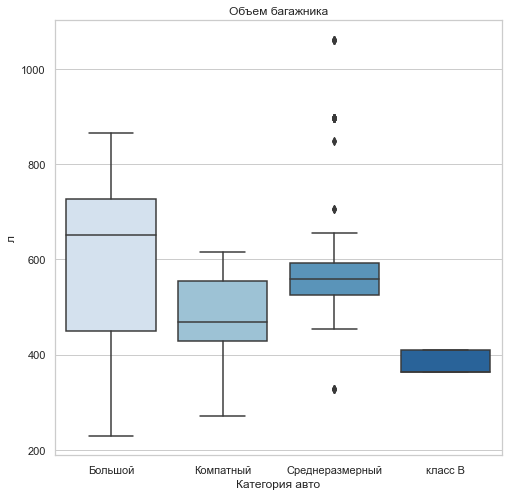

In [157]:
draw_boxplot((8,8),x_data=cross_auto['class'], y_data=cross_auto['trunk_volume'], hue=None,\
                     palette='Blues', title='Объем багажника',\
                     x_label='Категория авто',y_label='л')

Среди кроссоверов можно увидеть, что размер багажника и размер машины связаны.

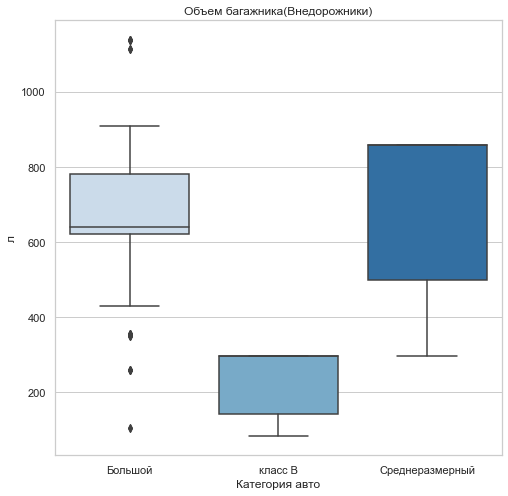

In [158]:
draw_boxplot((8,8),x_data=offw_auto['class'], y_data=offw_auto['trunk_volume'], hue=None,\
                     palette='Blues', title='Объем багажника(Внедорожники)',\
                     x_label='Категория авто',y_label='л')

У внедорожников прямой связи медлу размером машины и объемом багажника нет.

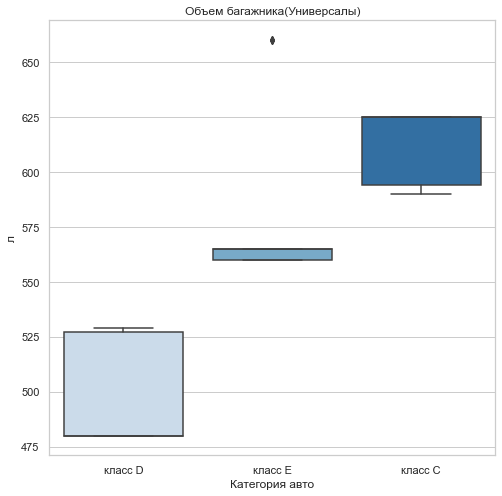

In [159]:
draw_boxplot((8,8),x_data=un_auto['class'], y_data=un_auto['trunk_volume'], hue=None,\
                     palette='Blues', title='Объем багажника(Универсалы)',\
                     x_label='Категория авто',y_label='л')

У универсалов также нельзя выявить свяь между классом и объемом.

In [160]:
autos['trunk_volume_max'].describe()

count    1703.000000
mean     1360.088667
std       947.489501
min         0.000000
25%       520.000000
50%      1421.000000
75%      1731.000000
max      5800.000000
Name: trunk_volume_max, dtype: float64

Проверим у каких автомобилей 0 максимальные объемы багажника.

In [161]:
autos[autos['trunk_volume_max']==0].groupby(['brand','model','type_car'])['trunk_volume_max'].median()

brand          model   type_car            
Lexus          ES      Седан класса E          0
               LC 500  Спорткупе               0
               UX      Компактный кроссовер    0
Mercedes-Benz  X       Пикап                   0
Mitsubishi     L200    Пикап                   0
Toyota         Hilux   Пикап                   0
Volkswagen     Amarok  Пикап                   0
Name: trunk_volume_max, dtype: int32

Пикапы багажника не имеют, у нас остаются только машины марки Lexus

In [162]:
autos[autos['brand']=='Lexus'].groupby(['brand','model','type_car'])['trunk_volume_max'].median()

brand  model   type_car                 
Lexus  ES      Седан класса E                  0
       GX      Большой внедорожник          1934
       LC 500  Спорткупе                       0
       LS      Седан класса F                480
       LX      Большой внедорожник          1274
       NX      Компактный кроссовер         1600
       RX      Среднеразмерный кроссовер    1626
       UX      Компактный кроссовер            0
Name: trunk_volume_max, dtype: int32

Заполним 0 медианными значениями по типу машины.

In [163]:
autos['trunk_volume_max']=autos.groupby('type_car')['trunk_volume_max'].transform(lambda x:x.replace(0, int(x.mean())))

In [164]:
sedan_auto=autos[autos['category']=='Седан']
cross_auto=autos[autos['category']=='Кроссовер']
offw_auto=autos[autos['category']=='Внедорожник']
un_auto=autos[autos['category']=='Универсал']
wen_auto=autos[autos['category']=='Вэн']
picup_auto=autos[autos['category']=='Пикап']

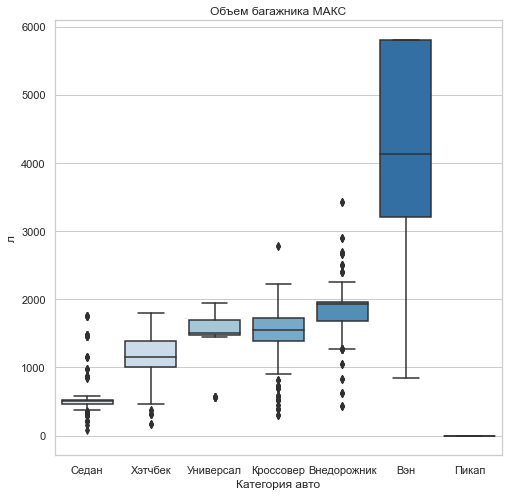

In [165]:
draw_boxplot((8,8),x_data=autos['category'], y_data=autos['trunk_volume_max'], hue=None,\
                     palette='Blues', title='Объем багажника МАКС',\
                     x_label='Категория авто',y_label='л')

Здесь уже заметно, что каждый тип авто имеет свои максимальные объемы багажников. Самый объемный у вэнов, далее идут внедорожники, затем кроссоверы и универсалы, потом хэтчбеки и седаны.

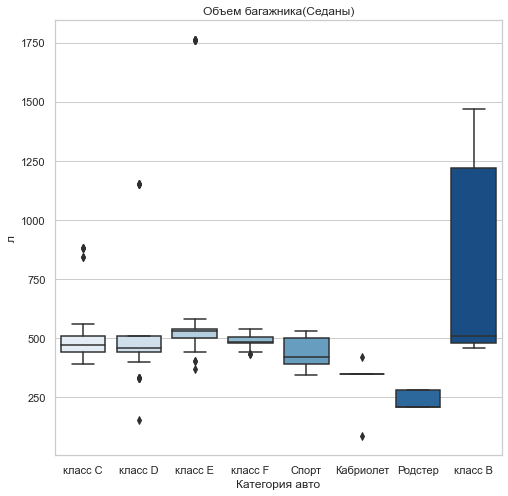

In [166]:
draw_boxplot((8,8),x_data=sedan_auto['class'], y_data=sedan_auto['trunk_volume_max'], hue=None,\
                     palette='Blues', title='Объем багажника(Седаны)',\
                     x_label='Категория авто',y_label='л')

Максимальный объем багажника и класс не имеют какой-то заметной связи. Видно, что спортивные авто, кабриолеты и родстеры имеют багажники меньше, чем остальные седаны.

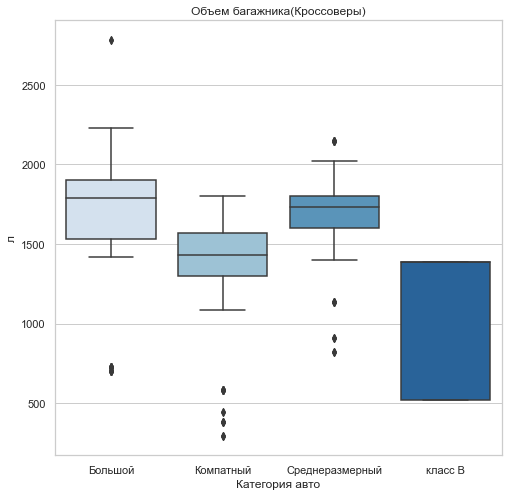

In [167]:
draw_boxplot((8,8),x_data=cross_auto['class'], y_data=cross_auto['trunk_volume_max'], hue=None,\
                     palette='Blues', title='Объем багажника(Кроссоверы)',\
                     x_label='Категория авто',y_label='л')

У кроссоверов максимальный объем багажника растет с размером автомобиля.

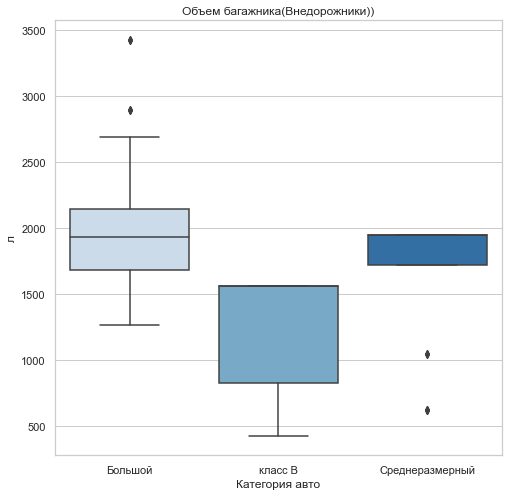

In [168]:
draw_boxplot((8,8),x_data=offw_auto['class'], y_data=offw_auto['trunk_volume_max'], hue=None,\
                     palette='Blues', title='Объем багажника(Внедорожники))',\
                     x_label='Категория авто',y_label='л')

У внедорожников также также видна связь между размером машины и максимальным размером багажника.

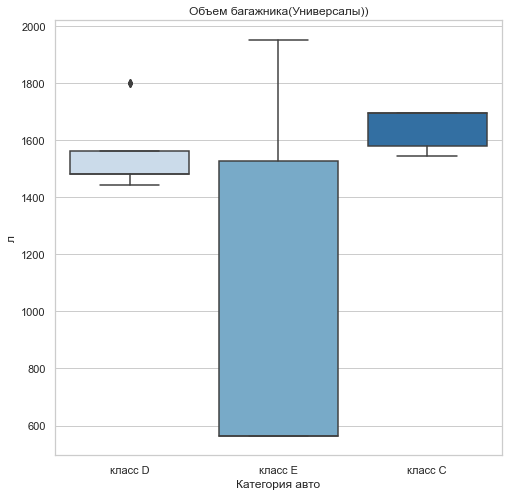

In [169]:
draw_boxplot((8,8),x_data=un_auto['class'], y_data=un_auto['trunk_volume_max'], hue=None,\
                     palette='Blues', title='Объем багажника(Универсалы))',\
                     x_label='Категория авто',y_label='л')

У универсалов также явной зависимости между классом и объемом багажника нет.

Посмтотрим на расход топлива. Здесь я буду смотреть только смешанный расход, который вычисляется на основании расходов в городе и на трассе.

In [170]:
autos['fuel_cons_mixed'].describe()

count    1703.000000
mean        6.168937
std         2.610364
min         0.000000
25%         5.700000
50%         6.800000
75%         7.700000
max        14.000000
Name: fuel_cons_mixed, dtype: float64

Посмторим у каких моделй указан 0й расход и не электрический двигатель.

In [171]:
autos[(autos['fuel_cons_mixed']==0)&(autos['engine_type']!='электрический')].groupby(['brand','model','type_car'])['type_car'].count()

brand       model               type_car           
Audi        A8                  Седан класса F          2
            S8                  Седан класса F          1
BMW         5 Series Sedan      Седан класса E          1
            7 Series Sedan      Седан класса F          1
            8 Series            Спорткупе               1
                                                       ..
Toyota      Hilux               Пикап                   1
            Land Cruiser 200    Большой внедорожник    12
            Land Cruiser Prado  Большой внедорожник     5
Volkswagen  Multivan            Вэн                     4
            Teramont            Большой кроссовер       3
Name: type_car, Length: 69, dtype: int64

Здесь я также заполню медианным расходом по типу

In [172]:
autos['fuel_cons_mixed']=autos.groupby('type_car')['fuel_cons_mixed'].transform(lambda x:x.replace(0, int(x.mean())))

In [173]:
sedan_auto=autos[autos['category']=='Седан']
cross_auto=autos[autos['category']=='Кроссовер']
offw_auto=autos[autos['category']=='Внедорожник']
un_auto=autos[autos['category']=='Универсал']
wen_auto=autos[autos['category']=='Вэн']
picup_auto=autos[autos['category']=='Пикап']

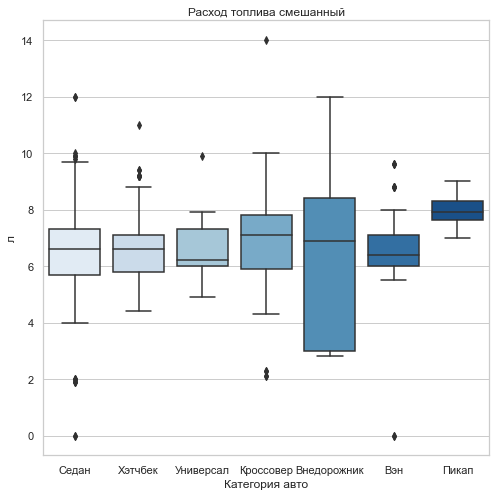

In [174]:
draw_boxplot((8,8),x_data=autos['category'], y_data=autos['fuel_cons_mixed'], hue=None,\
                     palette='Blues', title='Расход топлива смешанный',\
                     x_label='Категория авто',y_label='л')

Можно заметить, что пикапы, внедорожники и кроссоверы расходуют топлива больше, чем остальные типы.

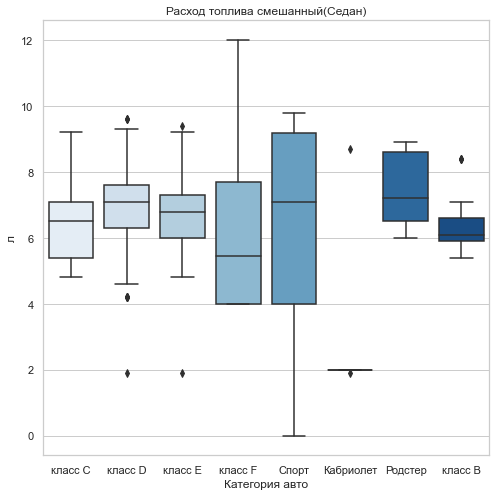

In [175]:
draw_boxplot((8,8),x_data=sedan_auto['class'], y_data=sedan_auto['fuel_cons_mixed'], hue=None,\
                     palette='Blues', title='Расход топлива смешанный(Седан)',\
                     x_label='Категория авто',y_label='л')

Заметно, что у седанов класса В расход топлива ниже, чем у остальных. Однако сильной закономерности между классом и потреблением выявить не удалось.

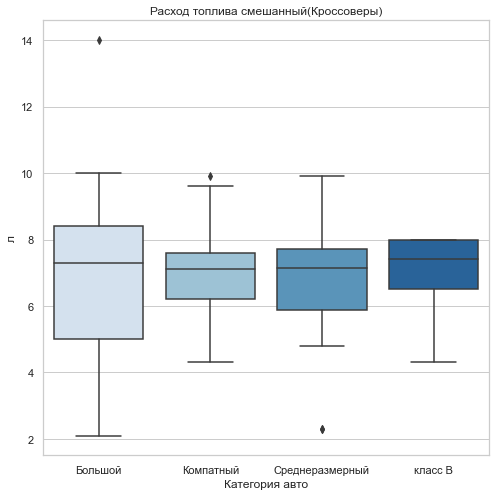

In [176]:
draw_boxplot((8,8),x_data=cross_auto['class'], y_data=cross_auto['fuel_cons_mixed'], hue=None,\
                     palette='Blues', title='Расход топлива смешанный(Кроссоверы)',\
                     x_label='Категория авто',y_label='л')

У кросовверов медианное значением потребления одинаковое, вне зависимоти от размера автомобиля.

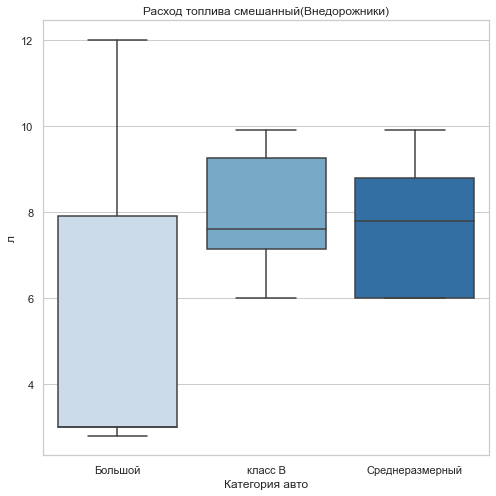

In [177]:
draw_boxplot((8,8),x_data=offw_auto['class'], y_data=offw_auto['fuel_cons_mixed'], hue=None,\
                     palette='Blues', title='Расход топлива смешанный(Внедорожники)',\
                     x_label='Категория авто',y_label='л')

У внедорожников также смешанный расход не зависит от размера.

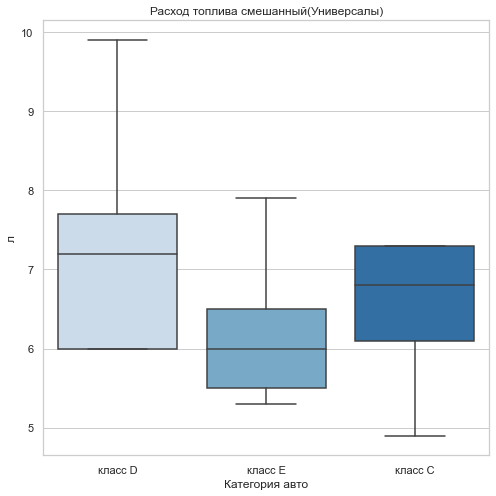

In [178]:
draw_boxplot((8,8),x_data=un_auto['class'], y_data=un_auto['fuel_cons_mixed'], hue=None,\
                     palette='Blues', title='Расход топлива смешанный(Универсалы)',\
                     x_label='Категория авто',y_label='л')

У универсалов связи между расходом и классом также нет.

Рекодируем наши классы в числа:

In [179]:
label_list={ 1:'Седан',
             2:'Кроссовер',
             3:'Хэтчбек',
             4:'Универсал',
             5:'Пикап',
             6:'Вэн',
             7:'Внедорожник'              
              }

autos['type_labeled']=0

In [180]:
for key, elem in label_list.items():
    autos.loc[autos['category']==elem,'type_labeled']=key    

Проверим есть ли корреляция между признаками

In [181]:
corr_matrix=round(autos.corr(),2)

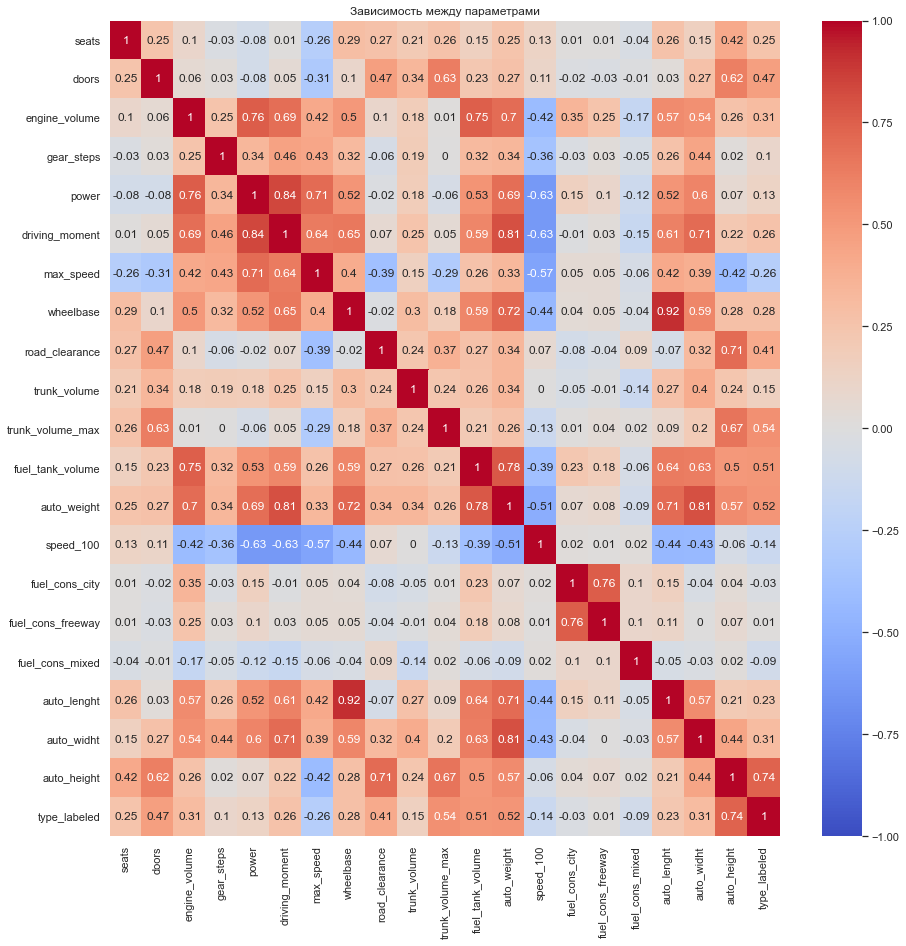

In [182]:
plt.figure(figsize=(15,15))
heat_map=sns.heatmap(corr_matrix, annot=True, vmax=1,vmin=-1,cmap= 'coolwarm')
heat_map.set_title('Зависимость между параметрами')
plt.show()

Видно, поля ниже сильно коррелируют между собой:

мощность авто - объем двигателя , 

объем двигателя - крутящий момент,

мощность авто- крутящий момент,

мощность - максимальная скорость,

колесная база - крутящий момент,

объем бензобака - объем двигателя,

вес авто - объем двигателя,

вес авто - крутящий момент,

вес авто - колесная база,

длина авто - колесная база, 

длина авто - вес авто,

ширина авто - крутящий момент,

ширина авто - вес авто,

высота авто - дорожный просвет,

высота авто - тип авто


### 2.Построение модели классификации


Перед нами стоит задача классификации двух и более типов, поэтому создадим поле целевого признака с типами авто: Седан, Кроссовер, Внедорожник, Хэтчбек. Универсалы отнесем к хэтчбекам, а вэны к седанам. В идеале, для универсалов нужен отдельный класс, т.к. в каких-то признаках универсалы ближе к хэтчбекам, в каких-то - ближе к седанам, а где-то образуют отдельную группую.

In [183]:
autos['target']=0

In [184]:
target_list={'Седан':1,
             'Кроссовер':2,
             'Хэтчбек':3,
             'Универсал':3,
             'Пикап':4,
             'Вэн':1,
             'Внедорожник':4              
              }

In [185]:
for key, elem in target_list.items():
    autos.loc[autos['category']==key,'target']=elem

Уберем всю информацию по бренду и комплектациям, информацию о типе кузова, категорию и класс авто(эти поля вводились для исследования входных данных), а также поля, сильно коррелирующие друг с другом:power, engine_volume, auto_widght и auto_height.

In [186]:
cols_to_del=['brand',
             'model',
             'complect',
             'type_car',
             'category',
             'class',
             'power',
             'engine_volume',
             'auto_widht', 
             'auto_height',
             'type_labeled']

In [187]:
autos=autos.drop(cols_to_del, axis=1)

Для решения задачи я буду использовать метод Кближайших соседей: у нас не большое признаков, много выбросов в данных, к которым метод не чувствителен, его легко применить и результаты легко объяснимы.
Создадим обучающую, валидационную и тестовую выборки

In [188]:
target=autos['target']
features=autos.drop('target',axis=1)

С помощью OHE рекодируем текстовые поля

In [189]:
features=pd.get_dummies(features, drop_first=1)

In [190]:
features_train,features_test, target_train, target_test=train_test_split(features, target, test_size=0.33, random_state=12345)

Для начала посмотрим на важность признаков и построим простейше дерево

In [191]:
dt_model=DecisionTreeClassifier()
dt_model.fit(features_train, target_train)

DecisionTreeClassifier()

In [192]:
fi=pd.DataFrame(dt_model.feature_importances_, index=features_train.columns.values,columns=['Importance'])\
                                                      .sort_values(by='Importance',ascending=False)

In [193]:
print('Важность признаков')
fi

Важность признаков


,Importance
road_clearance,0.403336
fuel_tank_volume,0.192278
doors,0.104511
trunk_volume_max,0.095158
wheelbase,0.043193
max_speed,0.036651
auto_weight,0.033806
gear_steps,0.021531
fuel_cons_mixed,0.019840
auto_lenght,0.013632


<Figure size 576x576 with 0 Axes>

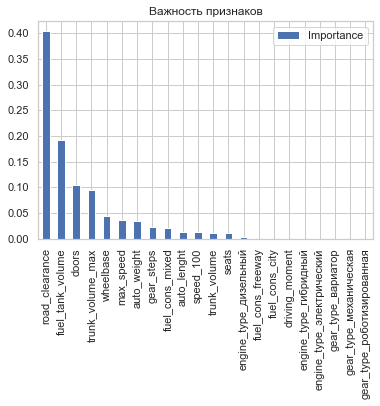

In [194]:
plt.figure(figsize=(8,8))
fi_plot=fi.plot(kind='bar',title='Важность признаков')
plt.show()

Видно, что тип двигателя и тип коробки не имеют весов при обучении, отбросим и их.

In [195]:
feat_to_del=fi[fi['Importance']==0].index
feat_to_del

Index(['fuel_cons_freeway', 'fuel_cons_city', 'driving_moment',
       'engine_type_гибридный', 'engine_type_электрический',
       'gear_type_вариатор', 'gear_type_механическая',
       'gear_type_роботизированная'],
      dtype='object')

In [196]:
features_train=features_train.drop(feat_to_del, axis=1)
features_test=features_test.drop(feat_to_del, axis=1)

Масштабируем входные данные

In [197]:
mm=MinMaxScaler()

mm.fit_transform(features_train)

array([[0.42857143, 0.5       , 0.88888889, ..., 0.6       , 0.69181034,
        1.        ],
       [0.71428571, 1.        , 0.88888889, ..., 0.21428571, 0.68405172,
        0.        ],
       [0.42857143, 0.83333333, 0.77777778, ..., 0.52857143, 0.475     ,
        0.        ],
       ...,
       [0.42857143, 0.5       , 0.55555556, ..., 0.45714286, 0.46336207,
        0.        ],
       [0.42857143, 0.83333333, 0.66666667, ..., 0.43571429, 0.35043103,
        1.        ],
       [0.42857143, 0.5       , 0.        , ..., 0.55714286, 0.42715517,
        0.        ]])

In [198]:
mm.transform(features_test)

array([[0.42857143, 0.83333333, 0.66666667, ..., 0.45      , 0.59525862,
        1.        ],
       [0.42857143, 0.83333333, 0.77777778, ..., 0.62857143, 0.56422414,
        1.        ],
       [0.42857143, 0.5       , 0.88888889, ..., 0.45714286, 0.3637931 ,
        0.        ],
       ...,
       [0.42857143, 0.33333333, 0.66666667, ..., 0.42857143, 0.34913793,
        0.        ],
       [0.42857143, 0.5       , 0.66666667, ..., 0.50714286, 0.29094828,
        0.        ],
       [0.42857143, 0.5       , 0.66666667, ..., 0.37857143, 0.31034483,
        1.        ]])

С помощью подбора гиперпараметров найдем оптимальную модель, в качестве оценки используем log_loss, тем качественне классифицирует наша модель. Ближайшего соседа будем искать с помощью деревьев, а 'взвешивать' по расстоянию(евклидово или Минковского).

In [199]:
model=KNeighborsClassifier()

params={'n_neighbors':range(3,75),
         'weights':['distance'],
         'algorithm':['kd_tree','ball_tree'],
         'n_jobs':[-1],
         'p':[1,2]
                
      }


gs_model=GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_log_loss')
gs_model.fit(features_train, target_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'ball_tree'], 'n_jobs': [-1],
                         'n_neighbors': range(3, 75), 'p': [1, 2],
                         'weights': ['distance']},
             scoring='neg_log_loss')

In [200]:
best_params=gs_model.best_params_

In [201]:
cols_to_hide=['std_fit_time',
              'std_score_time',
              'param_n_jobs',
              'split0_test_score',
              'split1_test_score',
              'split2_test_score',
              'split3_test_score',
              'split4_test_score']
res=pd.DataFrame(gs_model.cv_results_).sort_values(by='mean_test_score', ascending=False).drop(cols_to_hide, axis=1)

res.head(10)

,mean_fit_time,mean_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,mean_test_score,std_test_score,rank_test_score
202,0.003192,0.014750,ball_tree,32,1,distance,"{'algorithm': 'ball_tree', 'n_jobs': -1, 'n_ne...",-0.118627,0.056405,1
58,0.003988,0.014497,kd_tree,32,1,distance,"{'algorithm': 'kd_tree', 'n_jobs': -1, 'n_neig...",-0.118628,0.056404,2
204,0.003391,0.014769,ball_tree,33,1,distance,"{'algorithm': 'ball_tree', 'n_jobs': -1, 'n_ne...",-0.119783,0.056822,3
60,0.004188,0.014506,kd_tree,33,1,distance,"{'algorithm': 'kd_tree', 'n_jobs': -1, 'n_neig...",-0.119784,0.056822,4
206,0.003604,0.013846,ball_tree,34,1,distance,"{'algorithm': 'ball_tree', 'n_jobs': -1, 'n_ne...",-0.120975,0.057202,5
62,0.004385,0.014426,kd_tree,34,1,distance,"{'algorithm': 'kd_tree', 'n_jobs': -1, 'n_neig...",-0.120976,0.057201,6
208,0.003397,0.014293,ball_tree,35,1,distance,"{'algorithm': 'ball_tree', 'n_jobs': -1, 'n_ne...",-0.122174,0.057218,7
64,0.004390,0.015336,kd_tree,35,1,distance,"{'algorithm': 'kd_tree', 'n_jobs': -1, 'n_neig...",-0.122197,0.057202,8
210,0.003390,0.014126,ball_tree,36,1,distance,"{'algorithm': 'ball_tree', 'n_jobs': -1, 'n_ne...",-0.122842,0.057342,9
66,0.004391,0.014980,kd_tree,36,1,distance,"{'algorithm': 'kd_tree', 'n_jobs': -1, 'n_neig...",-0.122857,0.057337,10


In [202]:
model.set_params(**best_params)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=32, p=1,
                     weights='distance')

In [203]:
model.fit(features_train, target_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=32, p=1,
                     weights='distance')

In [204]:
pred_test=model.predict(features_test)

In [205]:
test_acc=accuracy_score(target_test,pred_test)
print('Точность модели: {:.2%}'.format(test_acc))

Точность модели: 97.69%


In [206]:
cf_m=pd.DataFrame(confusion_matrix(target_test, pred_test, normalize='true'),\
                  index=['Седан','Кроссовер','Хетчбек','Внедорожник'],\
                  columns=['Седан','Кроссовер','Хетчбек','Внедорожник'])

In [207]:
print('Результаты классификации %(тест):')
round(cf_m*100,1)

Результаты классификации %(тест):


,Седан,Кроссовер,Хетчбек,Внедорожник
Седан,98.3,0.0,1.1,0.6
Кроссовер,0.4,99.6,0.0,0.0
Хетчбек,4.5,7.5,88.1,0.0
Внедорожник,1.6,0.0,0.0,98.4


In [208]:
print(classification_report(target_test, pred_test))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       179
           2       0.98      1.00      0.99       253
           3       0.97      0.88      0.92        67
           4       0.98      0.98      0.98        63

    accuracy                           0.98       562
   macro avg       0.98      0.96      0.97       562
weighted avg       0.98      0.98      0.98       562



Мы получили модель, которая с точностью 98% корректно классифицирует автомобили. Среди автомобилей типа хетчбек самый большой процент неверных предсказаний, связано это с тем, что сюда мы также отнесли универсалы, которые могут по признакам походить как на седаны так и на хетчбеки или кроссоверы. Ошибка в классификации кроссовера и внедорожника тоже объяснима, иногда данные машины имеют абсолютно одинаковый набор характеристи, как правило сложно отличить средний внедорожник от большого кроссовера. В целом показатели ошибок находятся в пределах 5%, поэтому можно считать нашу модель рабочей.